In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import xlwings as xw
%matplotlib inline

In [2]:
os.chdir(r'G:\FinanceReports\2023\Wk28')

In [3]:
data=pd.read_excel('2023-SRSsales-productLevel-wk28.xlsx',sheet_name='2023')
df=pd.read_excel('2023-SRSsales-productLevel-wk28.xlsx',sheet_name='2022')

In [4]:
week=data.Week.max()
week
last_week=data.Week.max()-1

In [5]:
#Combines 2022 Sales Data with 2023 into one dataframe
data['Year']=data.StartDate.dt.year
df['Year']=df.StartDate.dt.year
total=pd.concat([data,df])
total.shape

(760252, 26)

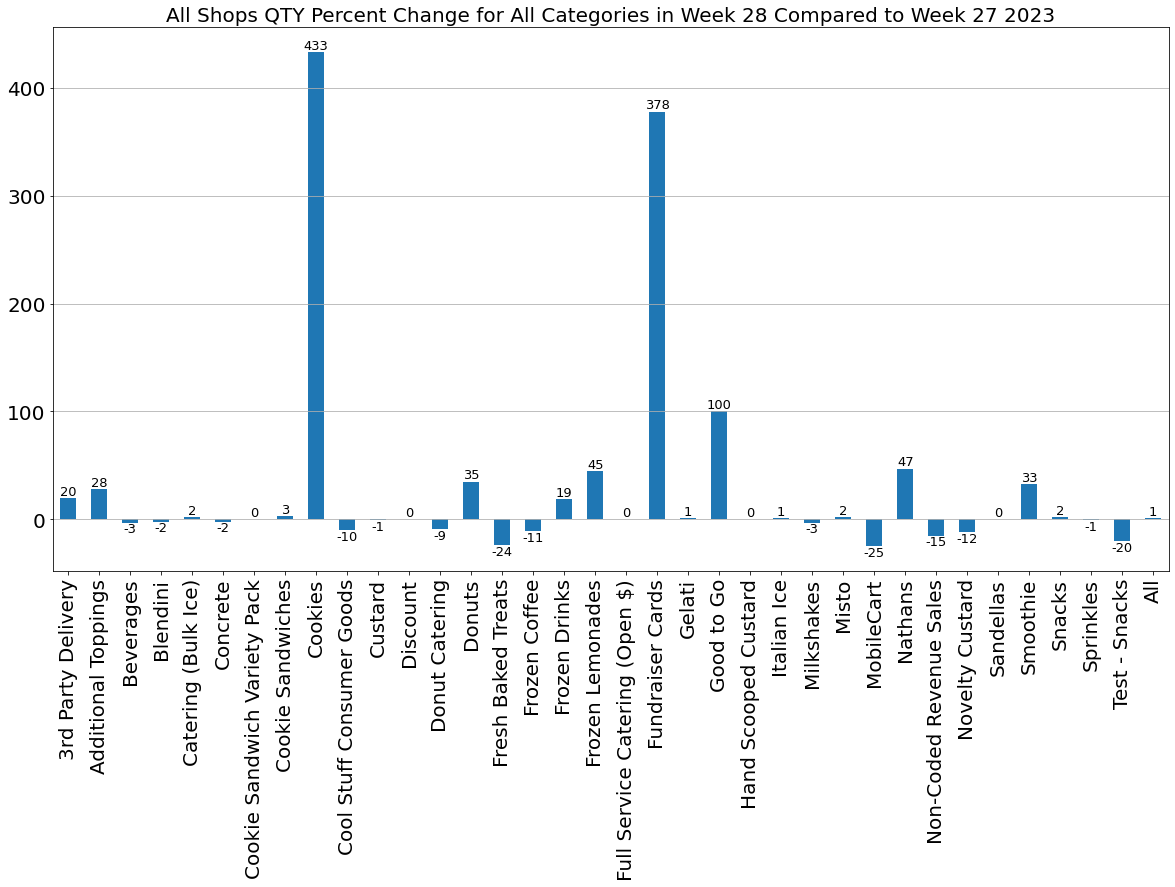

In [6]:
week_comp=data[data.Week>=data.Week.max()-1]
week_pivot=round(week_comp.pivot_table(index='ProductTypeName', columns='Week', values='SalesQty',aggfunc='sum', margins=True).reset_index(),2)
week_pivot['Perc_Change']=round((week_pivot.iloc[:,2]-week_pivot.iloc[:,1])/week_pivot.iloc[:,1],2)*100
ax=week_pivot['Perc_Change'].plot.bar(figsize=(20,10))
ax.set_xticklabels(week_pivot.ProductTypeName)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title('All Shops QTY Percent Change for All Categories in Week '+str(total.Week.max())+' Compared to Week '+str(total.Week.max()-1)+' 2023',fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.grid(axis='y')
plt.yticks(fontsize=20);

# Oatly Custard

In [7]:
oatly_shops=[127,658,571,550,519,753]
oatly_custard=[1278]

In [8]:
oatly=data[(data.ShopID.isin(oatly_shops))&(data.ProdSizeCode.isin(oatly_custard))]

In [106]:
data[(data.ShopID.isin(oatly_shops))&(data.ProdSizeCode.isin(oatly_custard))]

ShopID  intStoreID  ProductCode  ProdSizeCode  DiscountCode  Register  \
11964     571        2839            5          1278           126         1   
12320     658        5029            5          1278           126         1   
25577     658        5029            5          1278           126         1   

       SalesQty  SalesMny  StartDate    EndDate  ... ShopStatus  \
11964       108      54.0 2023-07-10 2023-07-16  ...       Open   
12320        46      23.0 2023-07-10 2023-07-16  ...       Open   
25577        24      12.0 2023-07-03 2023-07-09  ...       Open   

          LegacyShopType LegacyShopStatus ProductTypeName ProductSizeName  \
11964  Walk-in / Walk-up     Rita's Store         Custard  Oatly Upcharge   
12320            Walk-in     Rita's Store         Custard  Oatly Upcharge   
25577            Walk-in     Rita's Store         Custard  Oatly Upcharge   

      SpecialVenue CoOpStatus        CoOpName CoOpRate  Year  
11964           No         No             NaN     0.00  2023  
12320           No        Yes  CO-OP PH/WI/TR     0.02  2023  
25577           No        Yes  CO-OP PH/WI/TR     0.02  2023  

[3 rows x 26 columns]

In [108]:
data[(data.ShopID==127)&(data.ProductTypeName=='Custard')].ProductSizeName.unique()

array(['Large SS Cup/Cone', 'Small SS Sundae', 'Large SS Sundae',
       'Small Brownie Sundae', 'Large Brownie Sundae', 'SS Extra Custard',
       'Waffle Cone/Bowl Upcharge', 'Take Home Custard',
       'Fresh Baked Waffle Cone/Bowl', 'Kids SS Cup/Cone',
       'Small SS Cup/Cone', 'FDOS Custard Topper'], dtype=object)

In [9]:
oatly.pivot_table(index='ShopID',columns='Week',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()

Week ShopID  27   28  All
0       571   0  108  108
1       658  24   46   70
2       All  24  154  178

### Kids Cup

In [10]:
test_stores=[289,306,413,501,691,1376,1451]
control=[117,192,441]
products=[5,1246,1219,1215,1216,1218,107,111,7,1214,454]

In [11]:
kids_ice=xw.Book()
sht=kids_ice.sheets[0]
sht.name='Kids Ice Graphs'

In [12]:
#Combines 2022 Sales Data with 2023 into one dataframe
data['Year']=data.StartDate.dt.year
df['Year']=df.StartDate.dt.year
total=pd.concat([data,df])
total.shape

(760252, 26)

In [13]:
#ice_flights=total[(total.ProductSizeName=='Ice Flights')&(total.ShopID.isin(test_stores))]

In [14]:
#ice_flights.pivot_table(index='ShopName',columns='Year',values=['SalesMny','SalesQty'],aggfunc='sum').reset_index()

In [15]:
testing=total[(total.ShopID.isin(test_stores)&(total.ProdSizeCode.isin(products)))]
controling=total[(total.ShopID.isin(control)&(total.ProdSizeCode.isin(products)))]

In [16]:
controling.ShopID.unique()

array([117, 192, 441], dtype=int64)

In [17]:
testing_pivot=testing.pivot_table(index='ProductSizeName',columns='Year',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()
control_pivot=controling.pivot_table(index='ProductSizeName',columns='Year',values='SalesQty',aggfunc='sum',margins=True).reset_index()

In [18]:
control_pivot

Year    ProductSizeName   2022   2023     All
0           Ice Flights    969   1110    2079
1              Kids Ice  10963  11078   22041
2      Kids SS Cup/Cone   6082   6391   12473
3             Large Ice   8955   8290   17245
4     Large SS Cup/Cone   7269   7482   14751
5       Large SS Sundae    958    907    1865
6             Small Ice  20290  20644   40934
7     Small SS Cup/Cone  22578  24710   47288
8       Small SS Sundae   3045   3346    6391
9                   All  81109  83958  165067

In [19]:
testing.pivot_table(index='ShopName',columns='Year',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()


Year                          ShopName    2022    2023     All
0       1603 Ridgeside Dr.-Mt. Airy MD   14029   13461   27490
1     210 Kent Landing-Stevensville MD   19210   16962   36172
2         8640 Guilford Rd-Columbia MD   16069   15228   31297
3                         Burtonsville   15974   20424   36398
4                             Elkridge   17440   16753   34193
5                    Harpers Farm Road   14724   13620   28344
6                               Laurel   19201   17798   36999
7                                  All  116647  114246  230893

In [20]:
testing.pivot_table(index='ProductSizeName',columns='Year',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()

Year    ProductSizeName    2022    2023     All
0           Ice Flights    2051    2035    4086
1              Kids Ice   14391    3571   17962
2      Kids SS Cup/Cone    7107    2893   10000
3             Large Ice   22073   20567   42640
4     Large SS Cone/Cup      61       0      61
5     Large SS Cup/Cone    9389    9693   19082
6       Large SS Sundae    1187    1180    2367
7             Small Ice   32798   39451   72249
8     Small SS Cup/Cone   24528   31294   55822
9       Small SS Sundae    3062    3562    6624
10                  All  116647  114246  230893

In [21]:
testing_pivot.drop([3],inplace=True)

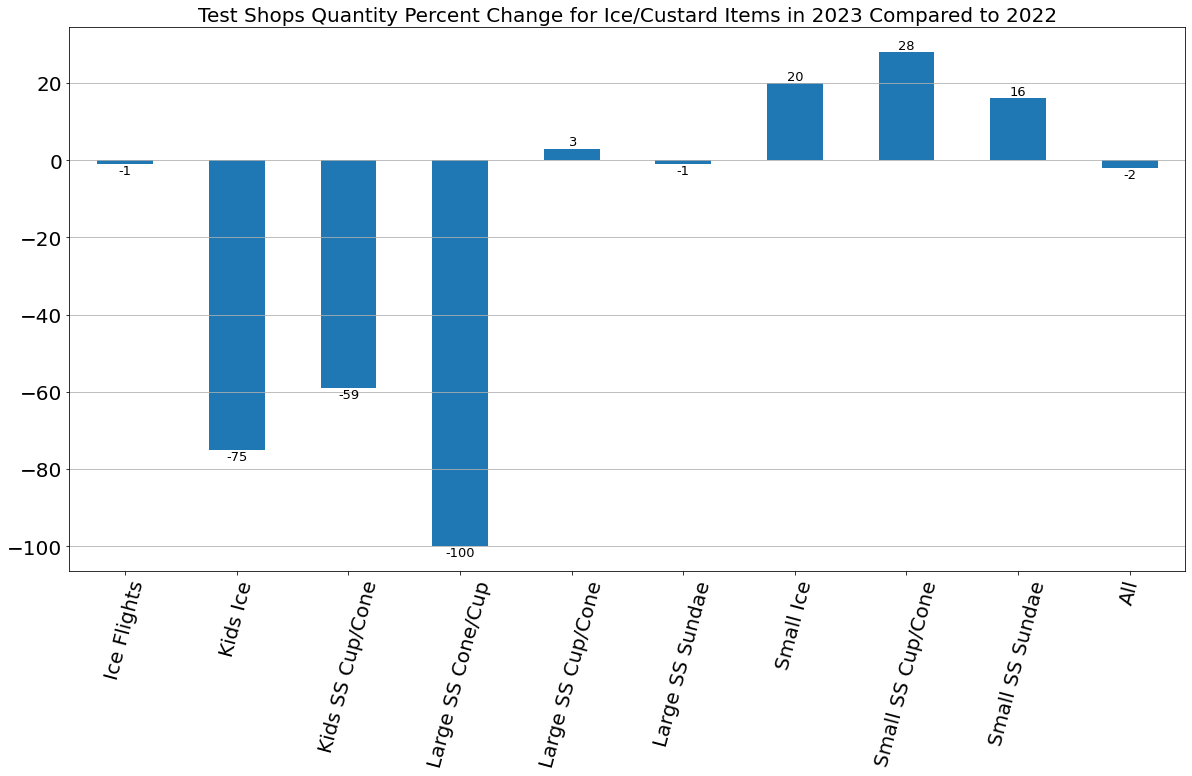

In [22]:
testing_pivot['Perc_Change']=round((testing_pivot.iloc[:,2]-testing_pivot.iloc[:,1])/testing_pivot.iloc[:,1],2)*100
ax=testing_pivot['Perc_Change'].plot.bar(figsize=(20,10))
ax.set_xticklabels(testing_pivot.ProductSizeName)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title('Test Shops Quantity Percent Change for Ice/Custard Items in '+str(total.Year.max())+' Compared to '+str(total.Year.min()),fontsize=20)
plt.xticks(fontsize=20,rotation=75)
plt.grid(axis='y')
plt.yticks(fontsize=20);


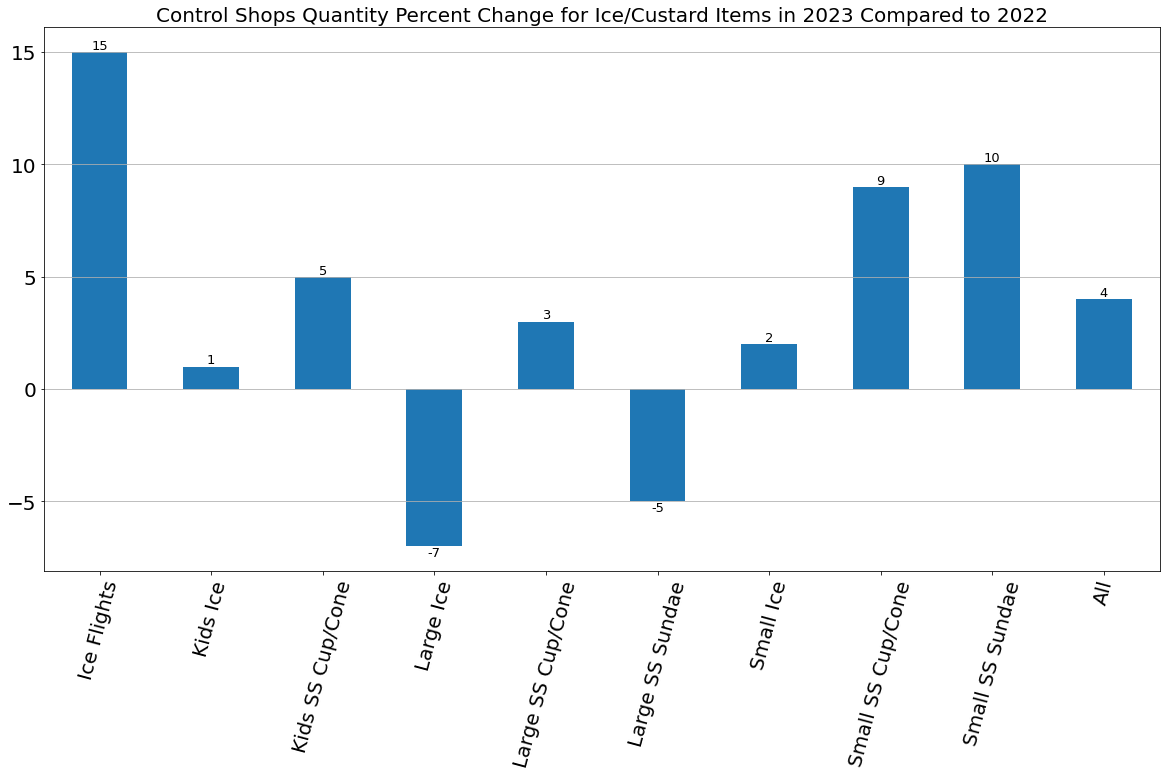

In [23]:
control_pivot['Perc_Change']=round((control_pivot.iloc[:,2]-control_pivot.iloc[:,1])/control_pivot.iloc[:,1],2)*100
ax=control_pivot['Perc_Change'].plot.bar(figsize=(20,10))
ax.set_xticklabels(control_pivot.ProductSizeName)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title('Control Shops Quantity Percent Change for Ice/Custard Items in '+str(total.Year.max())+' Compared to '+str(total.Year.min()),fontsize=20)
plt.xticks(fontsize=20,rotation=75)
plt.grid(axis='y')
plt.yticks(fontsize=20);

In [24]:
#Gets the Test and Control Shops by specific Years
test_2022=total[(total.ShopID.isin(test_stores)&(total.ProdSizeCode.isin(products))&(total.Year==2022))]
test_2023=total[(total.ShopID.isin(test_stores)&(total.ProdSizeCode.isin(products))&(total.Year==2023))]
control_2022=total[(total.ShopID.isin(control)&(total.ProdSizeCode.isin(products))&(total.Year==2022))]
control_2023=total[(total.ShopID.isin(control)&(total.ProdSizeCode.isin(products))&(total.Year==2023))]

In [25]:
#Groups the Test and Control Shop Sales and Quantity by Product and then gets overall sales percentage
plot_1=test_2022.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sort_values(by='SalesMny',ascending=False).reset_index()
plot_2=test_2023.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sort_values(by='SalesMny',ascending=False).reset_index()
plot_3=control_2022.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sort_values(by='SalesMny',ascending=False).reset_index()
plot_4=control_2023.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sort_values(by='SalesMny',ascending=False).reset_index()
test_2022_totals=test_2022.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sum()
test_2023_totals=test_2023.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sum()
control_2022_totals=control_2022.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sum()
control_2023_totals=control_2023.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sum()

In [26]:
#Test Shops 2022
plot_1['Sales%']=round((plot_1['SalesMny']/test_2022_totals[0])*100,2)
plot_1['Qty%']=round((plot_1['SalesQty']/test_2022_totals[1])*100,2)
plot_1.iloc[:,3:5].sort_values(by='Sales%',ascending=False)
plot_1=plot_1[plot_1['Sales%'] >1]

In [27]:
#Test Shops 2023
plot_2['Sales%']=round((plot_2['SalesMny']/test_2023_totals[0])*100,2)
plot_2['Qty%']=round((plot_2['SalesQty']/test_2023_totals[1])*100,2)
plot_2.iloc[:,3:5].sort_values(by='Sales%',ascending=False)
plot_2=plot_2[plot_2['Sales%'] >1]

In [28]:
#Control Shops 2022
plot_3['Sales%']=round((plot_3['SalesMny']/control_2022_totals[0])*100,2)
plot_3['Qty%']=round((plot_3['SalesQty']/control_2022_totals[1])*100,2)
plot_3.iloc[:,3:5].sort_values(by='Sales%',ascending=False)
plot_3=plot_3[plot_3['Sales%'] >1]

In [29]:
#Control Shops 2023
plot_4['Sales%']=round((plot_4['SalesMny']/control_2023_totals[0])*100,2)
plot_4['Qty%']=round((plot_4['SalesQty']/control_2023_totals[1])*100,2)
plot_4.iloc[:,3:5].sort_values(by='Sales%',ascending=False)
plot_4=plot_4[plot_4['Sales%'] >1]

''

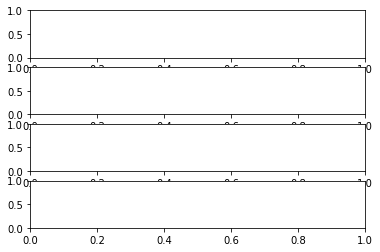

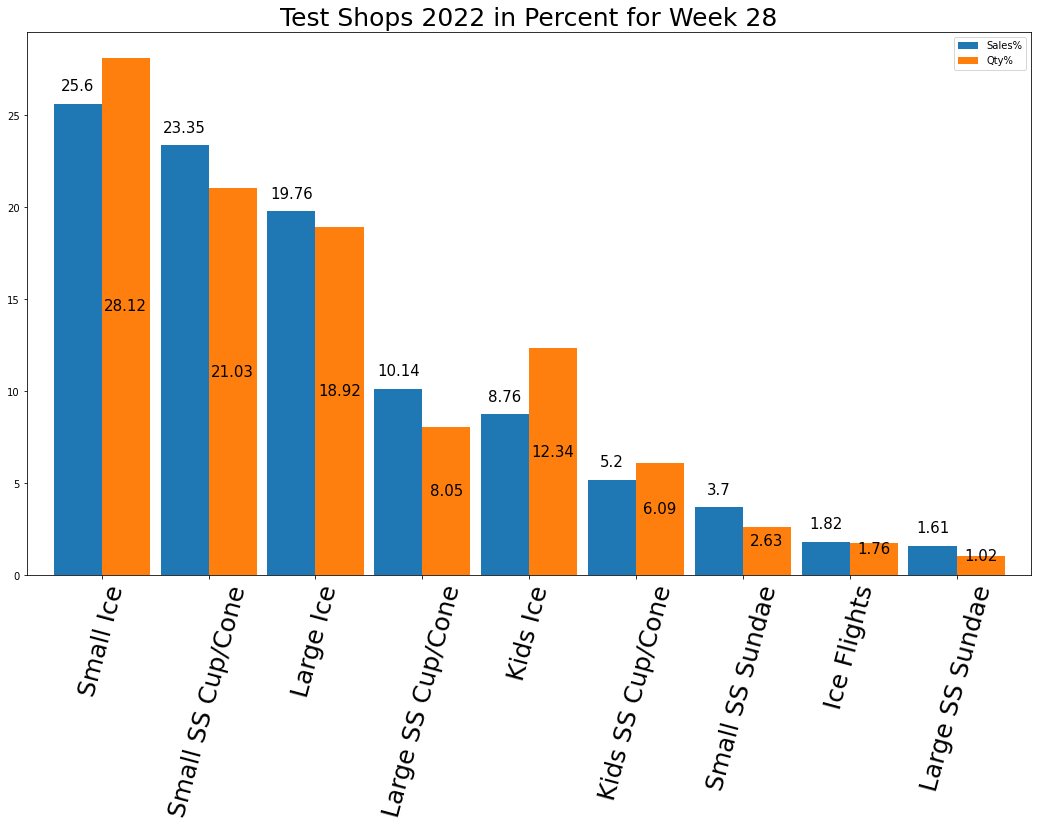

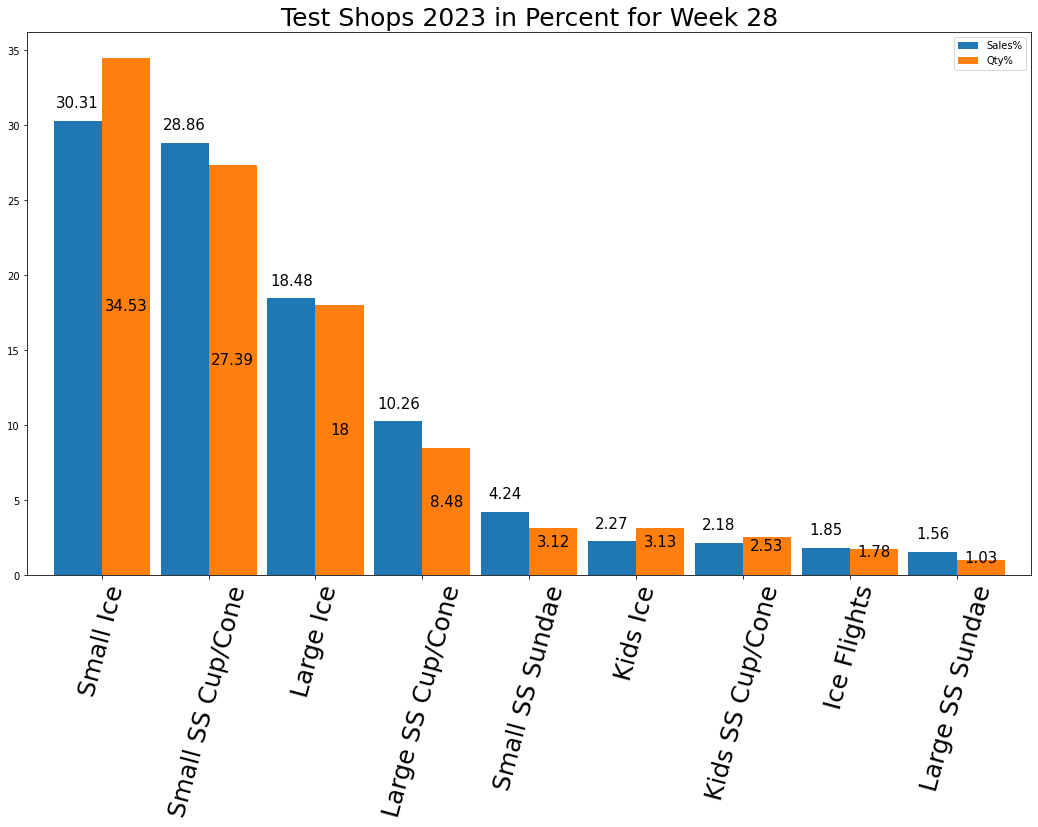

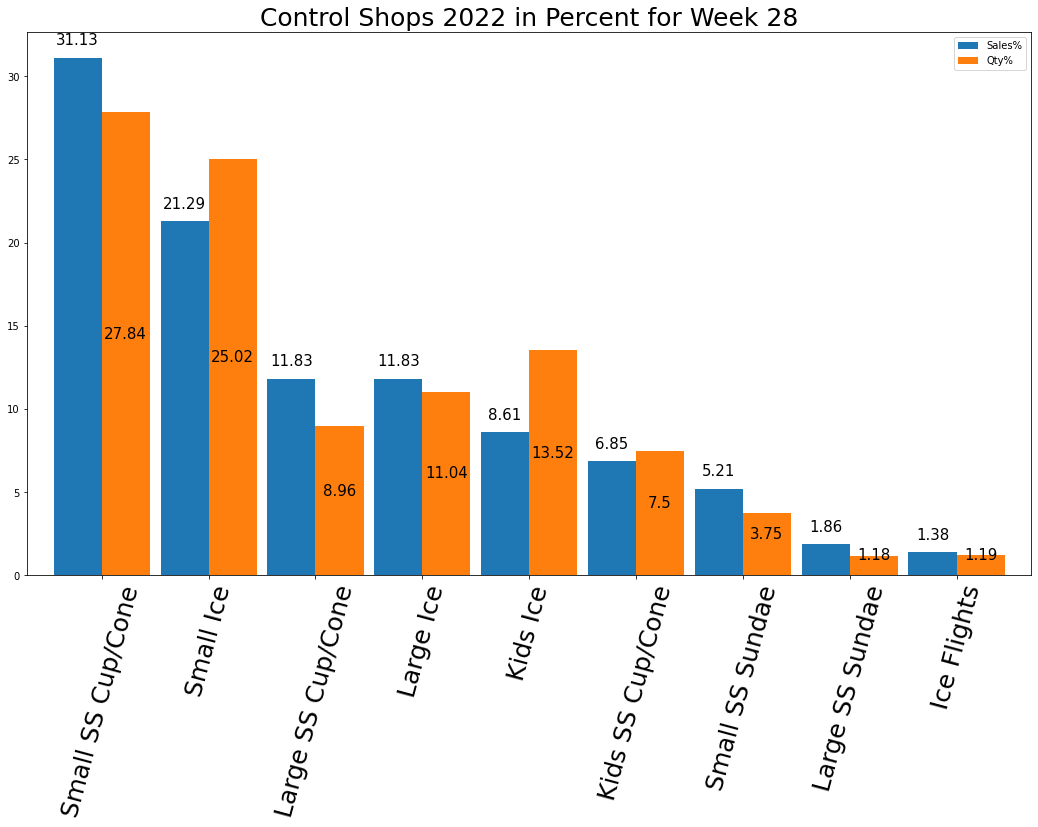

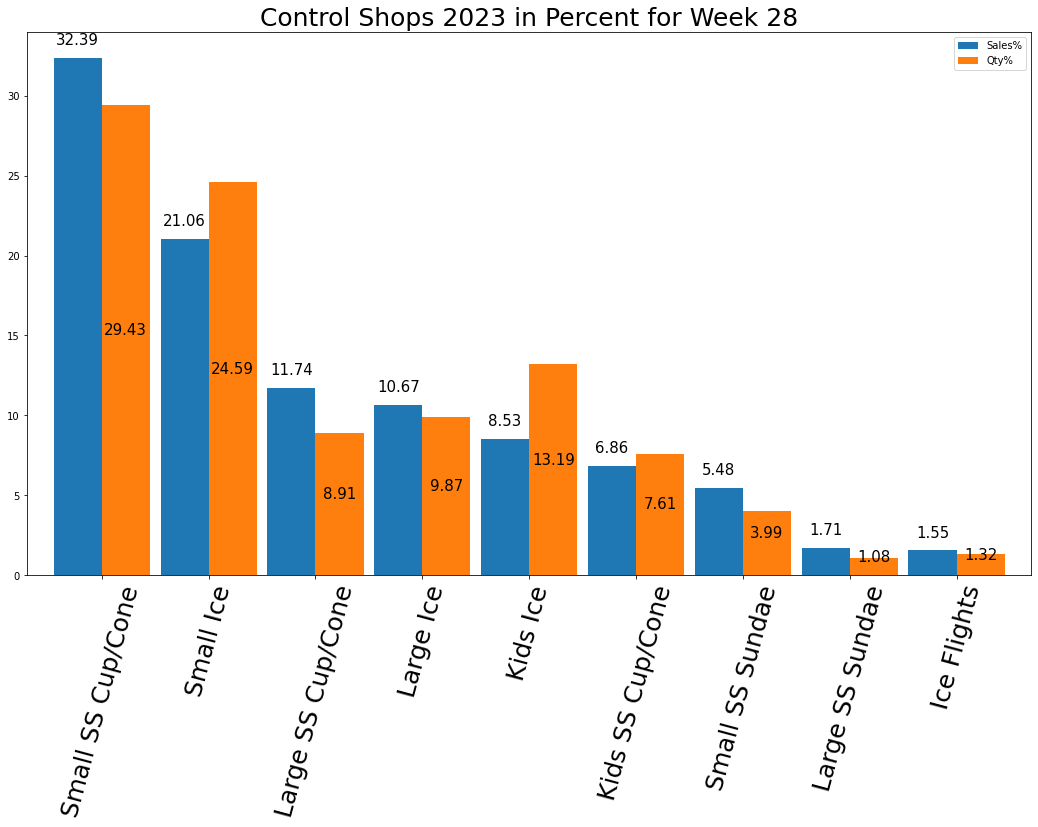

In [30]:
#Plots control and test shops by year for comparsion
fig,axs=plt.subplots(4)
axs.flatten()
axs[0]=plot_1.iloc[:,3:5].sort_values(by='Sales%',ascending=False).plot.bar(figsize=(18,10),width=.9)
axs[0].set_xticklabels(plot_1.ProductSizeName,fontsize=25,rotation=75)
axs[0].bar_label(axs[0].containers[0],fontsize=15,label_type='edge',padding=10)
axs[0].bar_label(axs[0].containers[1],fontsize=15,label_type='center',padding=10)
axs[0].set_title('Test Shops 2022 in Percent for Week '+str(week),fontsize=25)
axs[1]=plot_2.iloc[:,3:5].sort_values(by='Sales%',ascending=False).plot.bar(figsize=(18,10),width=.9)
axs[1].set_xticklabels(plot_2.ProductSizeName,fontsize=25,rotation=75)
axs[1].bar_label(axs[1].containers[0],fontsize=15,label_type='edge',padding=10)
axs[1].bar_label(axs[1].containers[1],fontsize=15,label_type='center',padding=10)
axs[1].set_title('Test Shops 2023 in Percent for Week '+str(week),fontsize=25)
axs[2]=plot_3.iloc[:,3:5].sort_values(by='Sales%',ascending=False).plot.bar(figsize=(18,10),width=.9)
axs[2].set_xticklabels(plot_3.ProductSizeName,fontsize=25,rotation=75)
axs[2].bar_label(axs[2].containers[0],fontsize=15,label_type='edge',padding=10)
axs[2].bar_label(axs[2].containers[1],fontsize=15,label_type='center',padding=10)
axs[2].set_title('Control Shops 2022 in Percent for Week '+str(week),fontsize=25)
axs[3]=plot_4.iloc[:,3:5].sort_values(by='Sales%',ascending=False).plot.bar(figsize=(18,10),width=.9)
axs[3].set_xticklabels(plot_4.ProductSizeName,fontsize=25,rotation=75)
axs[3].bar_label(axs[3].containers[0],fontsize=15,label_type='edge',padding=10)
axs[3].bar_label(axs[3].containers[1],fontsize=15,label_type='center',padding=10)
axs[3].set_title('Control Shops 2023 in Percent for Week '+str(week),fontsize=25)
;


In [31]:
#Saves Plots to Excel
fig_0=axs[0].get_figure()
sht.pictures.add(fig_0,name='Pandas_1',left=-sht.range('A4').left,top=sht.range('A4').top,height=500,width=500)
fig_1=axs[1].get_figure()
sht.pictures.add(fig_1,name='Pandas_2',left=-sht.range('A34').left,top=sht.range('A34').top,height=500,width=500)
fig_2=axs[2].get_figure()
sht.pictures.add(fig_2,name='Pandas_3',left=-sht.range('M4').left,top=sht.range('M4').top,height=500,width=500)
fig_3=axs[3].get_figure()
sht.pictures.add(fig_3,name='Pandas_4',left=-sht.range('M34').left,top=sht.range('M34').top,height=500,width=500)


<Picture 'Pandas_4' in <Sheet [Book1]Kids Ice Graphs>>

In [32]:
#Groups the Products by Shop to get sales and quantity
totals_control_23=control_2023.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()
totals_control_22=control_2022.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()
#Gets the sum of sales and quantity by shop
control_totals_23=control_2023.groupby('ShopName')[['SalesMny','SalesQty']].sum().reset_index()
control_totals_22=control_2022.groupby('ShopName')[['SalesMny','SalesQty']].sum().reset_index()
#Groups the Products by Shop to get sales and quantity
totals_test_23=test_2023.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()
totals_test_22=test_2022.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()
#Gets the sum of sales and quantity by shop
test_totals_23=test_2023.groupby('ShopName')[['SalesMny','SalesQty']].sum().reset_index()
test_totals_22=test_2022.groupby('ShopName')[['SalesMny','SalesQty']].sum().reset_index()

In [33]:
test_totals_22

ShopName    SalesMny  SalesQty
0    1603 Ridgeside Dr.-Mt. Airy MD  56855.1250     14029
1  210 Kent Landing-Stevensville MD  79464.3270     19210
2      8640 Guilford Rd-Columbia MD  70524.1685     16069
3                      Burtonsville  52877.9100     15974
4                          Elkridge  68577.8860     17440
5                 Harpers Farm Road  64707.4150     14724
6                            Laurel  85670.8115     19201

In [34]:
#Gets the Sales and QTY % of Product for Controls Shops in 2023 and 2022
totals_control_23['SalesMny%']=totals_control_23.apply(lambda x,: round(x['SalesMny']/control_totals_23.at[0,'SalesMny']*100,2) if x['ShopName']==control_totals_23.at[0,'ShopName'] else
round(x['SalesMny']/control_totals_23.at[1,'SalesMny']*100,2) if x['ShopName']==control_totals_23.at[1,'ShopName'] else
round(x['SalesMny']/control_totals_23.at[2,'SalesMny']*100,2) if x['ShopName']==control_totals_23.at[2,'ShopName'] else 
round(x['SalesMny']/control_totals_23.at[3,'SalesMny']*100,2) if x['ShopName']==control_totals_23.at[3,'ShopName'] else 0, axis=1)

totals_control_23['SalesQty%']=totals_control_23.apply(lambda x,: round(x['SalesQty']/control_totals_23.at[0,'SalesQty']*100,2) if x['ShopName']==control_totals_23.at[0,'ShopName'] else
round(x['SalesQty']/control_totals_23.at[1,'SalesQty']*100,2) if x['ShopName']==control_totals_23.at[1,'ShopName'] else
round(x['SalesQty']/control_totals_23.at[2,'SalesQty']*100,2) if x['ShopName']==control_totals_23.at[2,'ShopName'] else 
round(x['SalesQty']/control_totals_23.at[3,'SalesQty']*100,2) if x['ShopName']==control_totals_23.at[3,'ShopName'] else 0,axis=1)
                                                       
totals_control_22['SalesMny%']=totals_control_22.apply(lambda x,: round(x['SalesMny']/control_totals_22.at[0,'SalesMny']*100,2) if x['ShopName']==control_totals_22.at[0,'ShopName'] else
round(x['SalesMny']/control_totals_22.at[1,'SalesMny']*100,2) if x['ShopName']==control_totals_22.at[1,'ShopName'] else
round(x['SalesMny']/control_totals_22.at[2,'SalesMny']*100,2) if x['ShopName']==control_totals_22.at[2,'ShopName'] else 
round(x['SalesMny']/control_totals_22.at[3,'SalesMny']*100,2) if x['ShopName']==control_totals_22.at[3,'ShopName'] else 0, axis=1)

totals_control_22['SalesQty%']=totals_control_22.apply(lambda x,: round(x['SalesQty']/control_totals_22.at[0,'SalesQty']*100,2) if x['ShopName']==control_totals_22.at[0,'ShopName'] else
round(x['SalesQty']/control_totals_22.at[1,'SalesQty']*100,2) if x['ShopName']==control_totals_22.at[1,'ShopName'] else
round(x['SalesQty']/control_totals_22.at[2,'SalesQty']*100,2) if x['ShopName']==control_totals_22.at[2,'ShopName'] else 
round(x['SalesQty']/control_totals_22.at[3,'SalesQty']*100,2) if x['ShopName']==control_totals_22.at[3,'ShopName'] else 0, axis=1)

In [35]:
#Gets the Sales and QTY % of Product for Test Shops in 2023 and 2022
totals_test_23['SalesMny%']=totals_test_23.apply(lambda x,: round(x['SalesMny']/test_totals_23.at[0,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[0,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[1,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[1,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[2,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[2,'ShopName'] else 
round(x['SalesMny']/test_totals_23.at[3,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[3,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[4,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[4,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[5,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[5,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[6,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[6,'ShopName'] else 0, axis=1)


totals_test_23['SalesQty%']=totals_test_23.apply(lambda x,: round(x['SalesQty']/test_totals_23.at[0,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[0,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[1,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[1,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[2,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[2,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[3,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[3,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[4,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[4,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[5,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[5,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[6,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[6,'ShopName'] else 0,axis=1)

totals_test_22['SalesMny%']=totals_test_22.apply(lambda x,: round(x['SalesMny']/test_totals_22.at[0,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[0,'ShopName'] else
round(x['SalesMny']/test_totals_22.at[1,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[1,'ShopName'] else
round(x['SalesMny']/test_totals_22.at[2,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[2,'ShopName'] else
round(x['SalesMny']/test_totals_22.at[3,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[3,'ShopName'] else 
round(x['SalesMny']/test_totals_22.at[4,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[4,'ShopName'] else 
round(x['SalesMny']/test_totals_22.at[5,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[5,'ShopName'] else 
round(x['SalesMny']/test_totals_22.at[6,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[6,'ShopName'] else 0,axis=1)

totals_test_22['SalesQty%']=totals_test_22.apply(lambda x,: round(x['SalesQty']/test_totals_22.at[0,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[0,'ShopName'] else
round(x['SalesQty']/test_totals_22.at[1,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[1,'ShopName'] else
round(x['SalesQty']/test_totals_22.at[2,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[2,'ShopName'] else
round(x['SalesQty']/test_totals_22.at[3,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[3,'ShopName'] else 
round(x['SalesQty']/test_totals_22.at[4,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[4,'ShopName'] else 
round(x['SalesQty']/test_totals_22.at[5,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[5,'ShopName'] else 
round(x['SalesQty']/test_totals_22.at[6,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[6,'ShopName'] else 0,axis=1)

In [36]:
#Filters only Products who have sold over 1%
totals_control_23.drop(['SalesMny','SalesQty'],axis=1,inplace=True)
totals_control_23=totals_control_23[totals_control_23['SalesMny%']>1].sort_values(by='SalesMny%', ascending=False)
#Filters only Products who have sold over 1%
totals_control_22.drop(['SalesMny','SalesQty'],axis=1,inplace=True)
totals_control_22=totals_control_22[totals_control_22['SalesMny%']>1].sort_values(by='SalesMny%', ascending=False)
#Filters only Products who have sold over 1%
totals_test_23.drop(['SalesMny','SalesQty'],axis=1,inplace=True)
totals_test_23=totals_test_23[totals_test_23['SalesMny%']>1].sort_values(by='SalesMny%', ascending=False)
#Filters only Products who have sold over 1%
totals_test_22.drop(['SalesMny','SalesQty'],axis=1,inplace=True)
totals_test_22=totals_test_22[totals_test_22['SalesMny%']>1].sort_values(by='SalesMny%', ascending=False)

In [37]:
#Creates a list of Shop Names in both the Control Groups for 2023 and 2022
control_shops_23=list(control_2023.ShopName.unique())
control_shops_22=list(control_2022.ShopName.unique())
#Creates a list of Shop Names in both the test Groups for 2023 and 2022
test_shops_23=list(test_2023.ShopName.unique())
test_shops_22=list(test_2022.ShopName.unique())

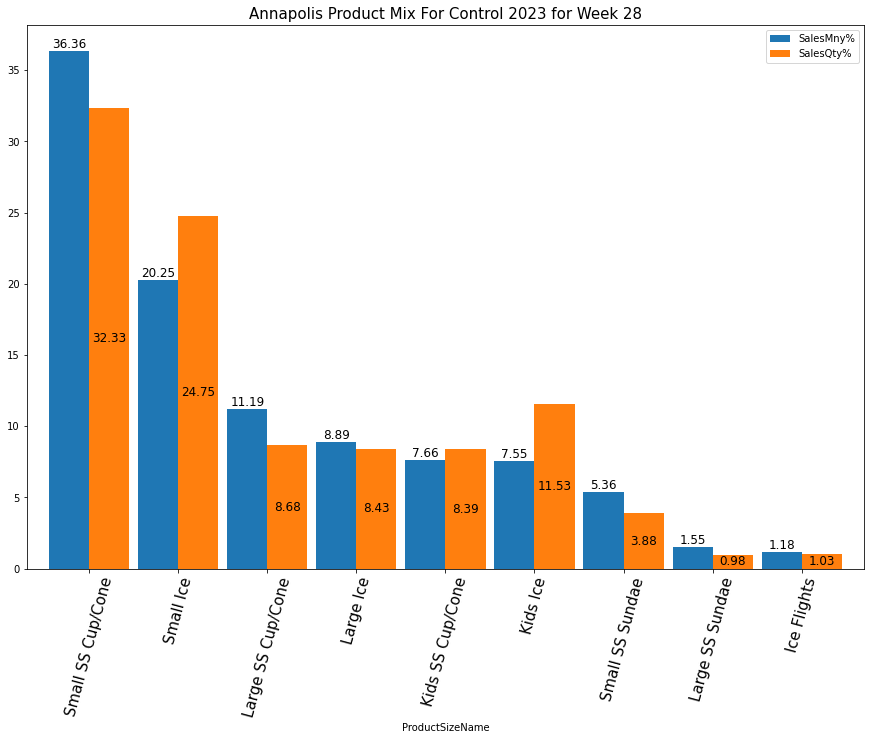

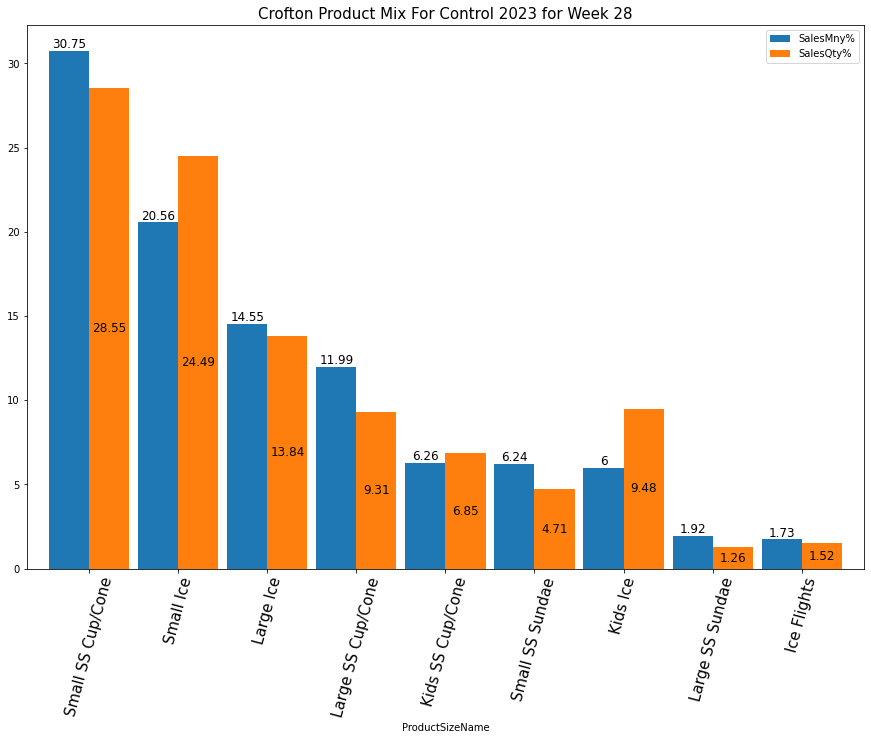

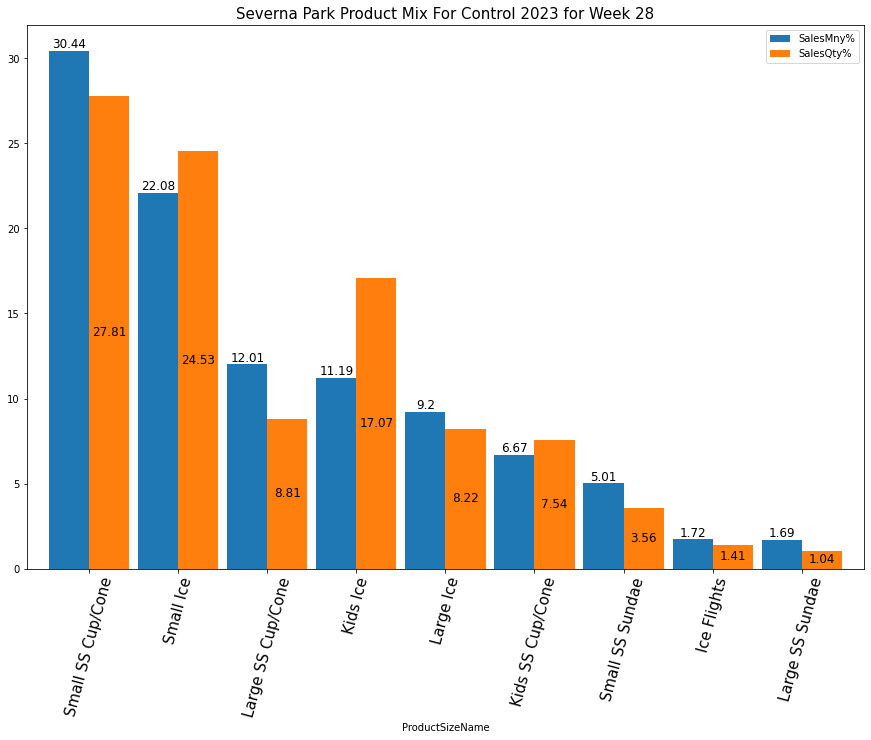

In [38]:
for i in enumerate(control_shops_23):
    plot=totals_control_23[totals_control_23.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(15,10),width=.9)
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12,label_type='center',)
    plt.title(str(i[1])+" Product Mix For Control 2023 for Week " +str(week),fontsize=15)
    plt.xticks(rotation=75,fontsize=15)

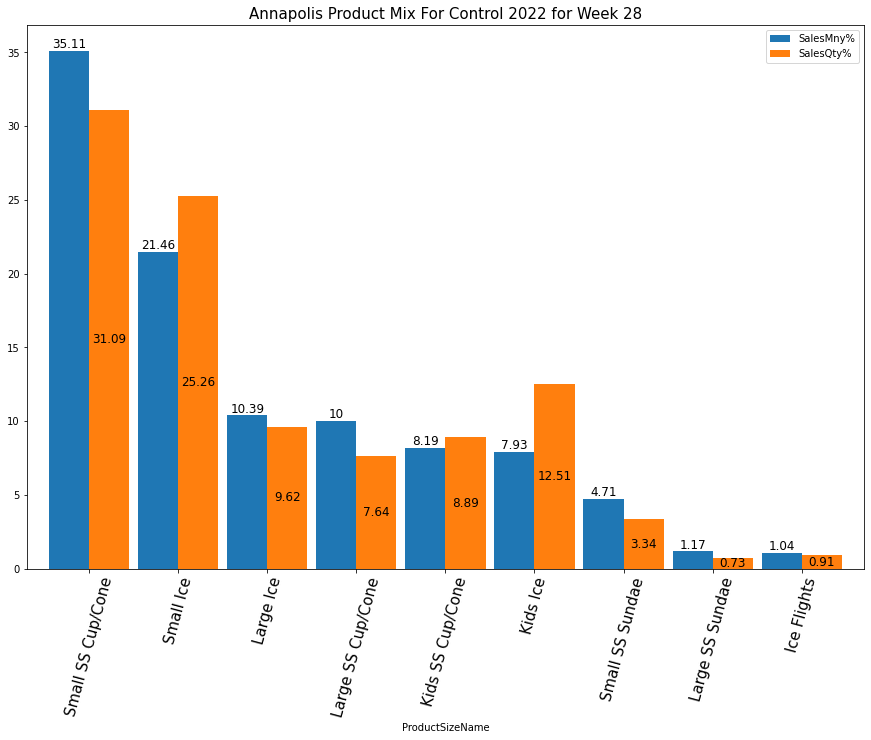

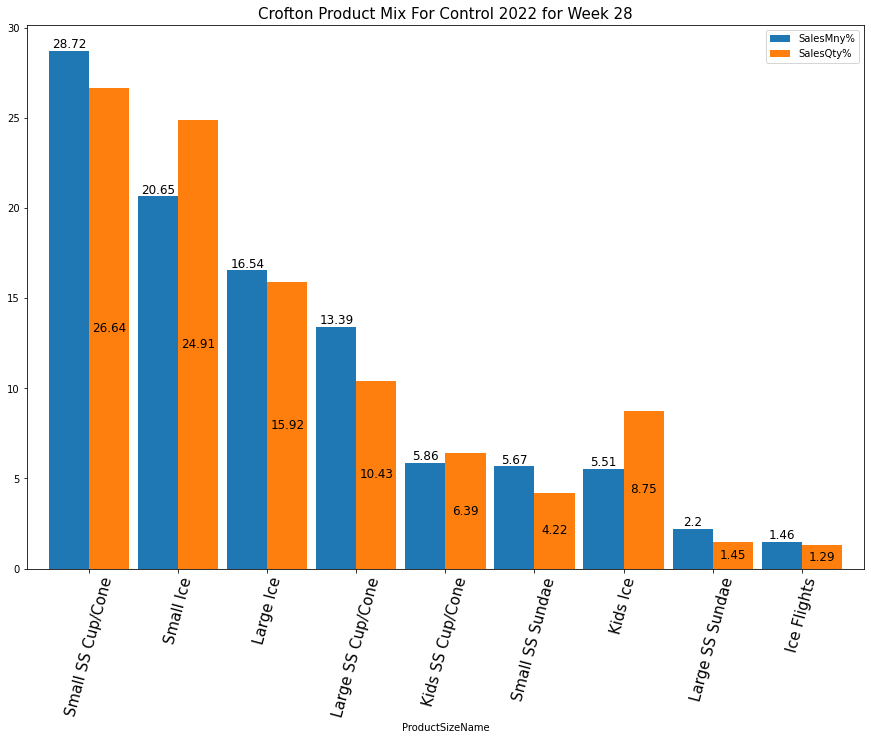

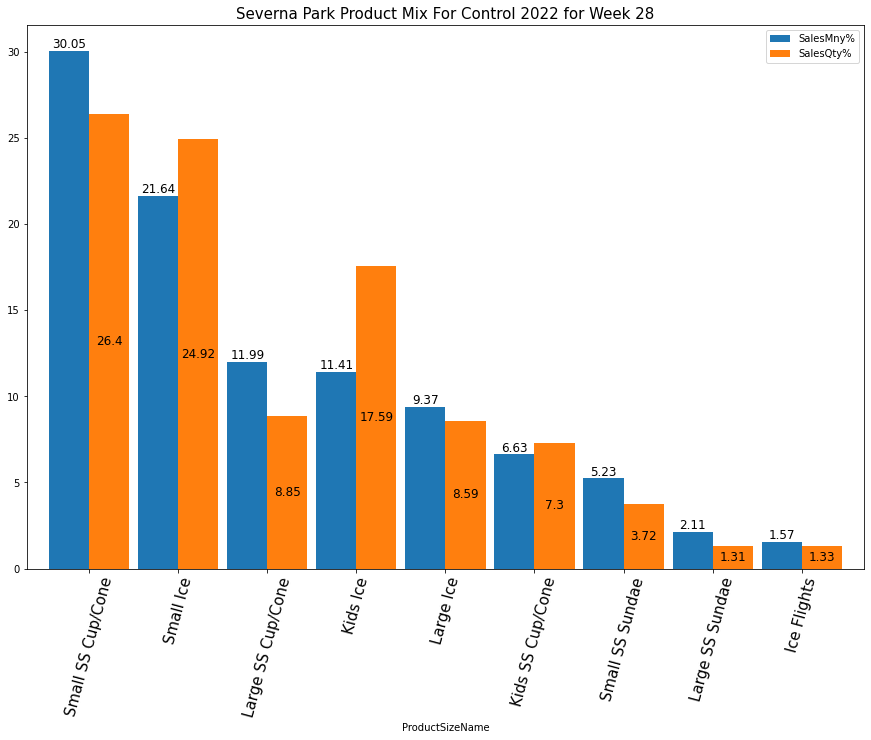

In [39]:
for i in enumerate(control_shops_22):
    plot=totals_control_22[totals_control_22.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(15,10),width=.9)
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12,label_type='center',)
    plt.title(str(i[1])+" Product Mix For Control 2022 for Week " +str(week),fontsize=15)
    plt.xticks(rotation=75,fontsize=15)

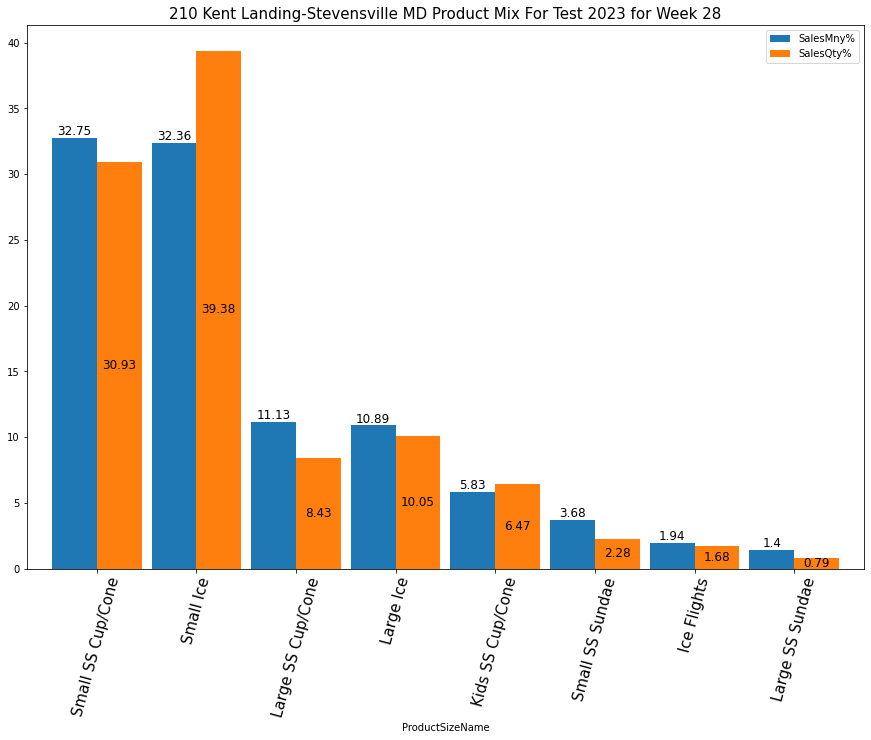

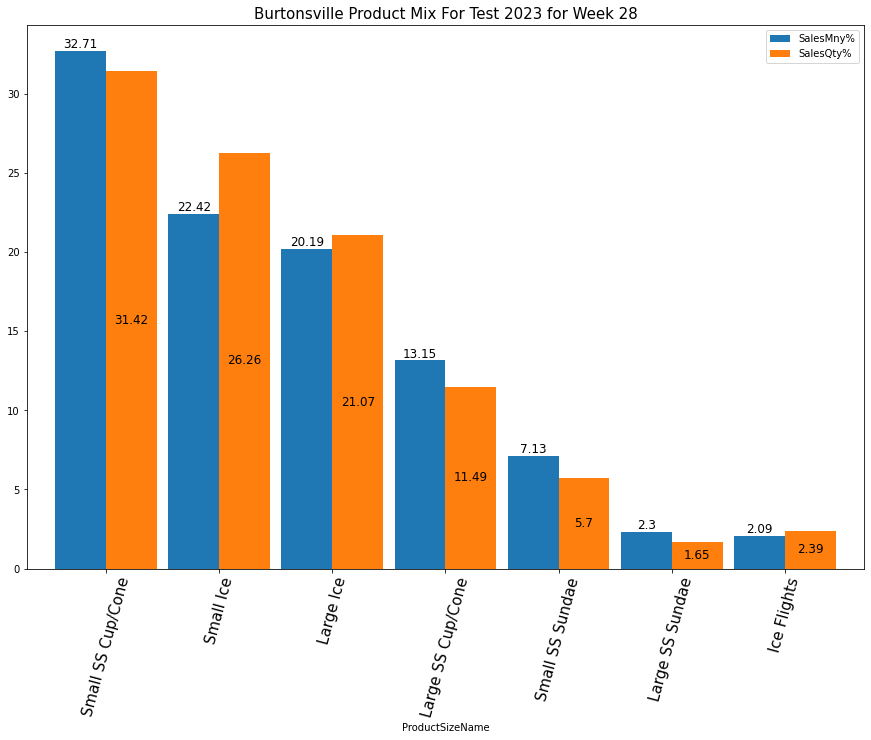

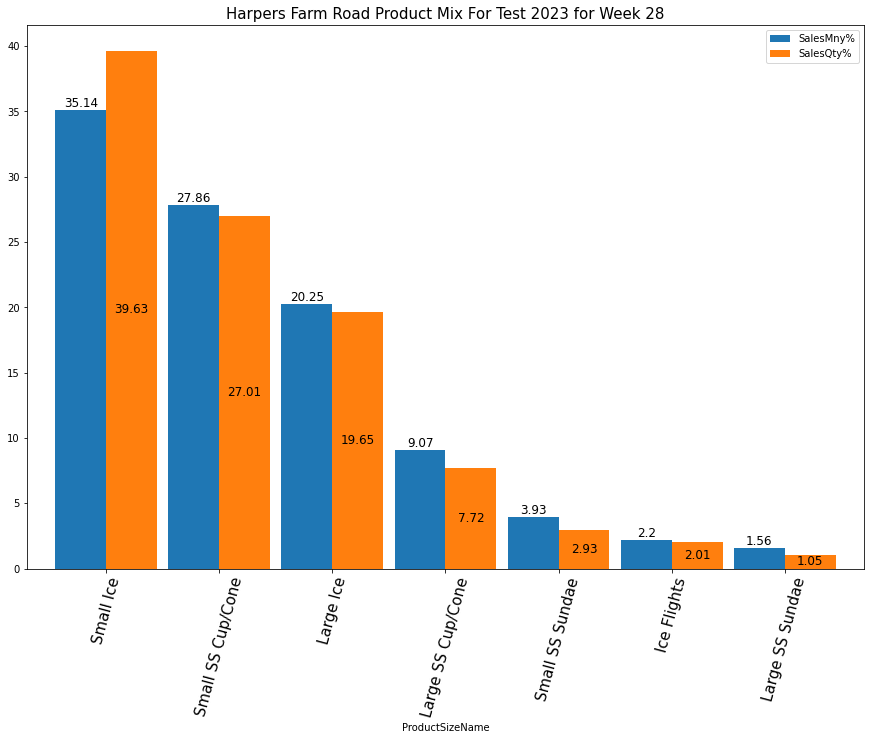

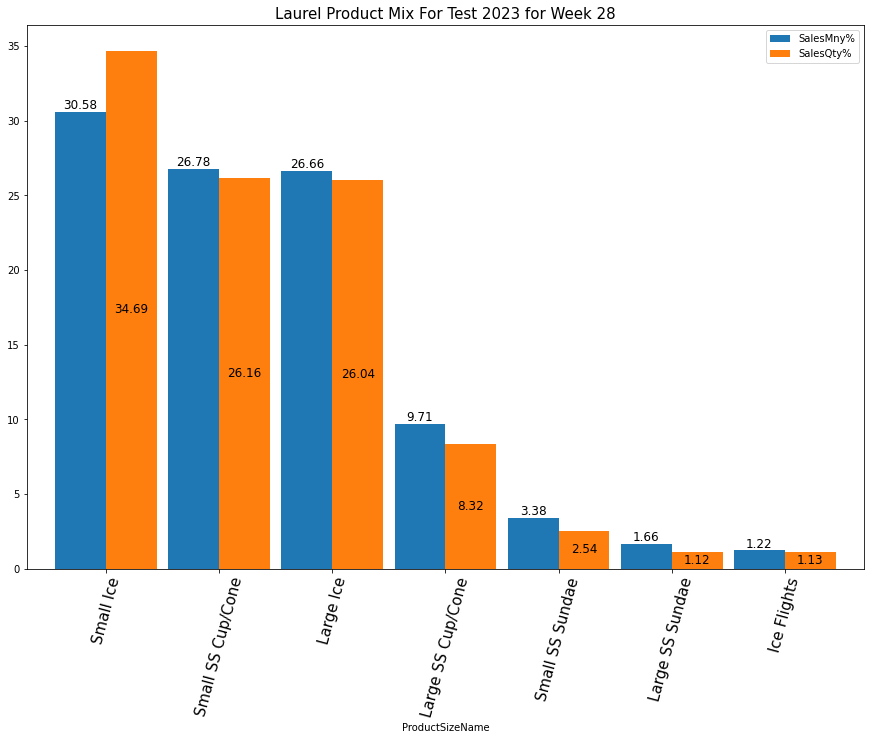

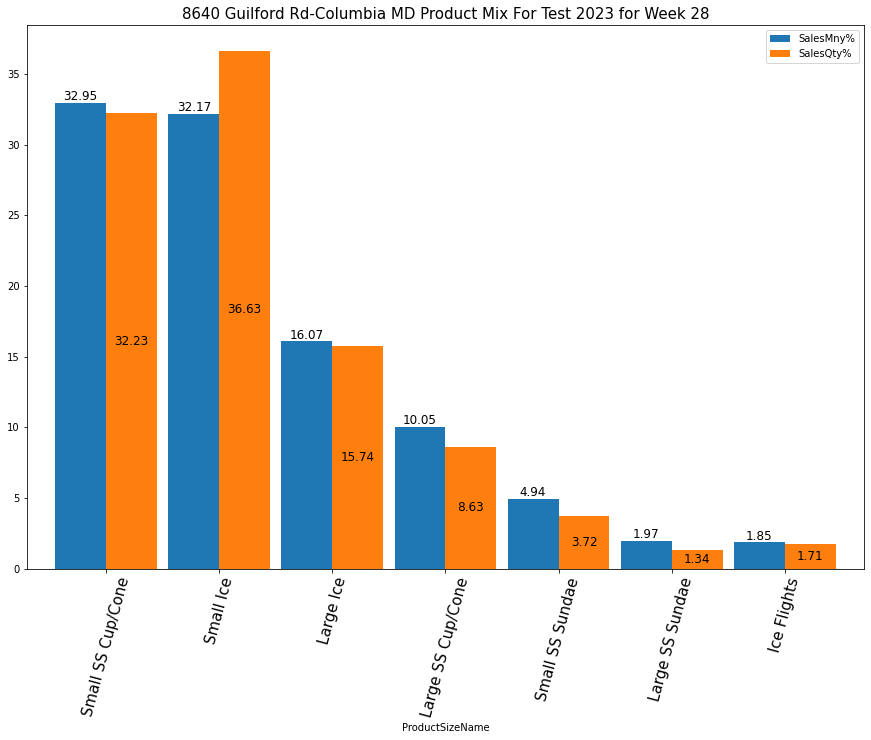

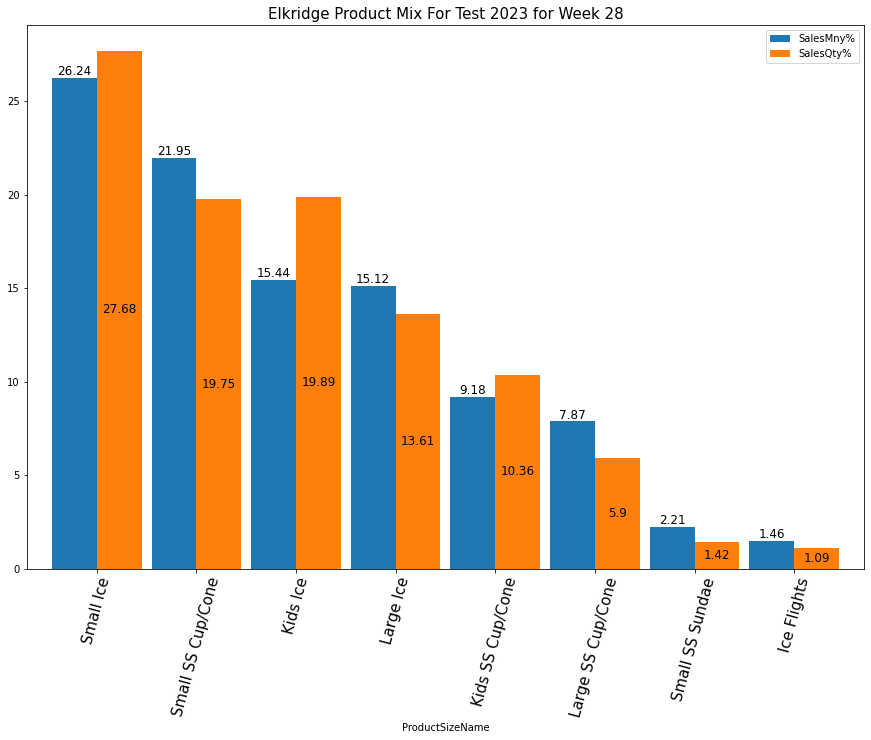

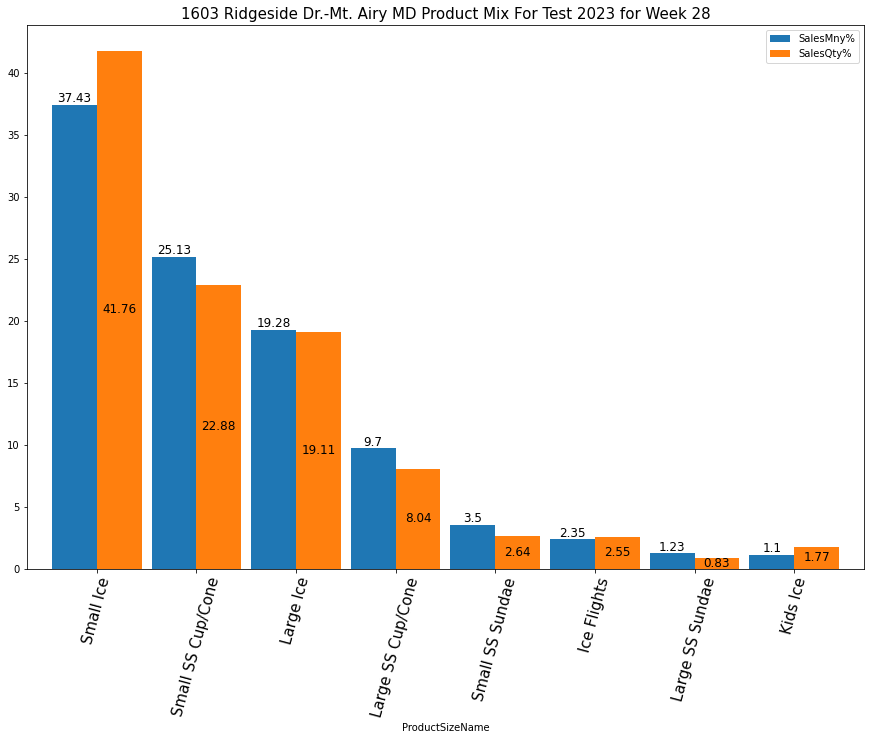

In [40]:
for i in enumerate(test_shops_23):
    plot=totals_test_23[totals_test_23.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(15,10),width=.9)
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12,label_type='center',)
    plt.title(str(i[1])+" Product Mix For Test 2023 for Week "+str(week),fontsize=15)
    plt.xticks(rotation=75,fontsize=15)

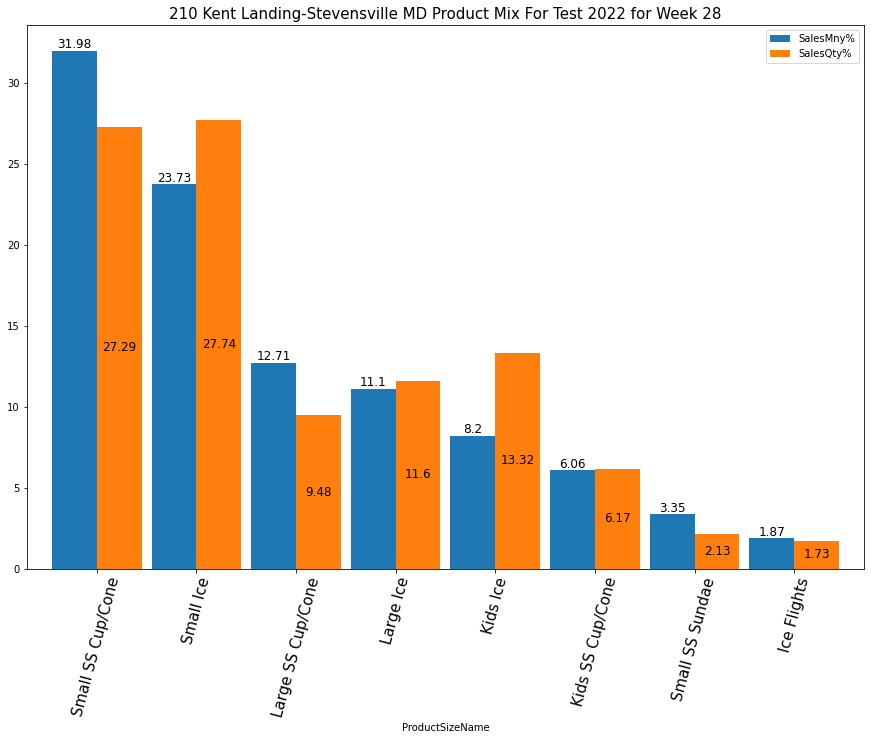

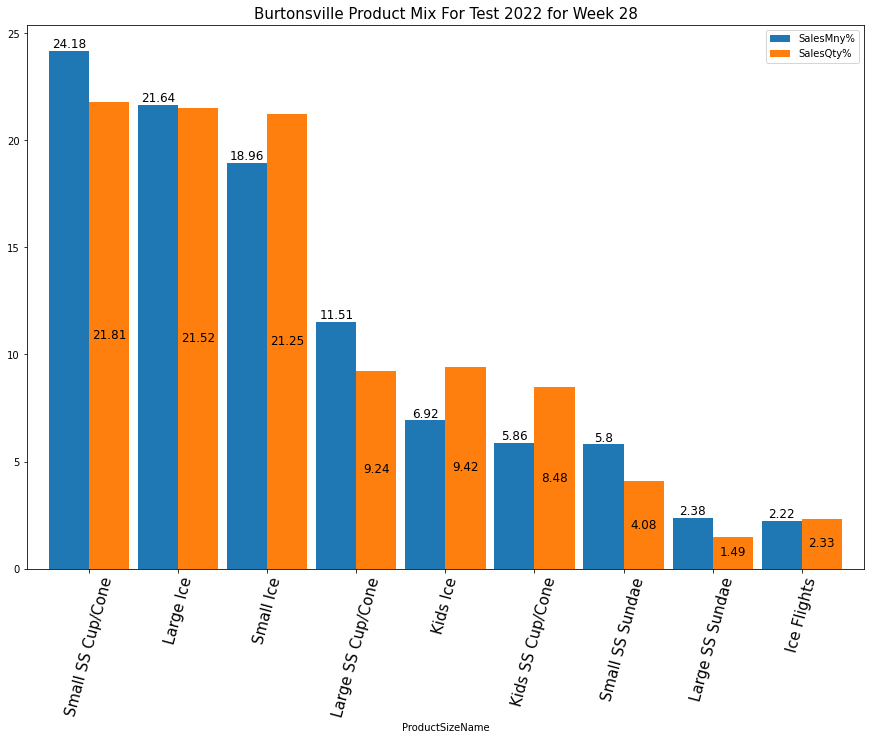

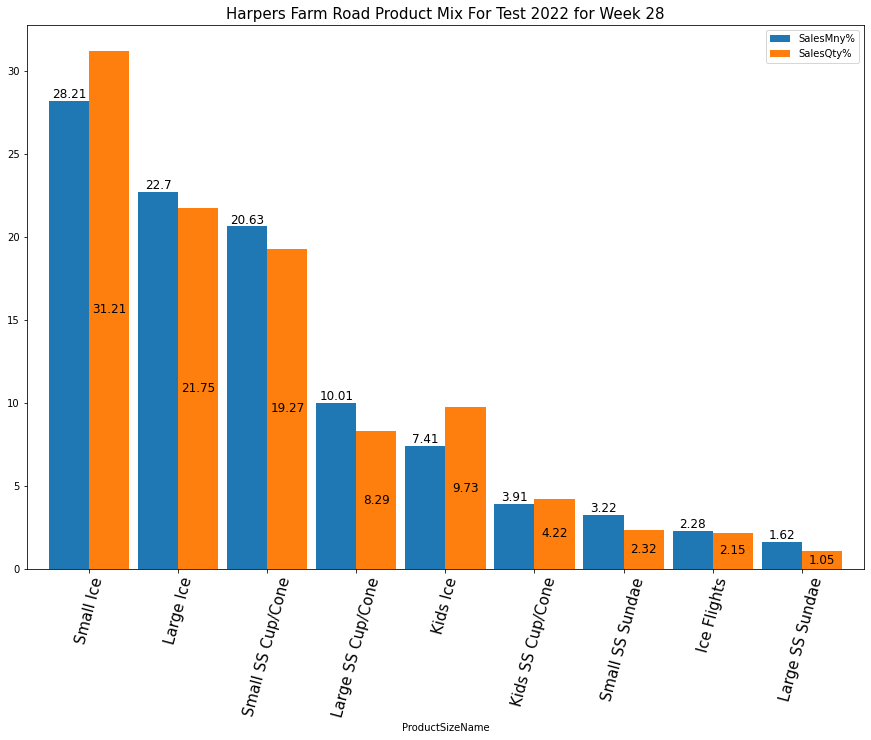

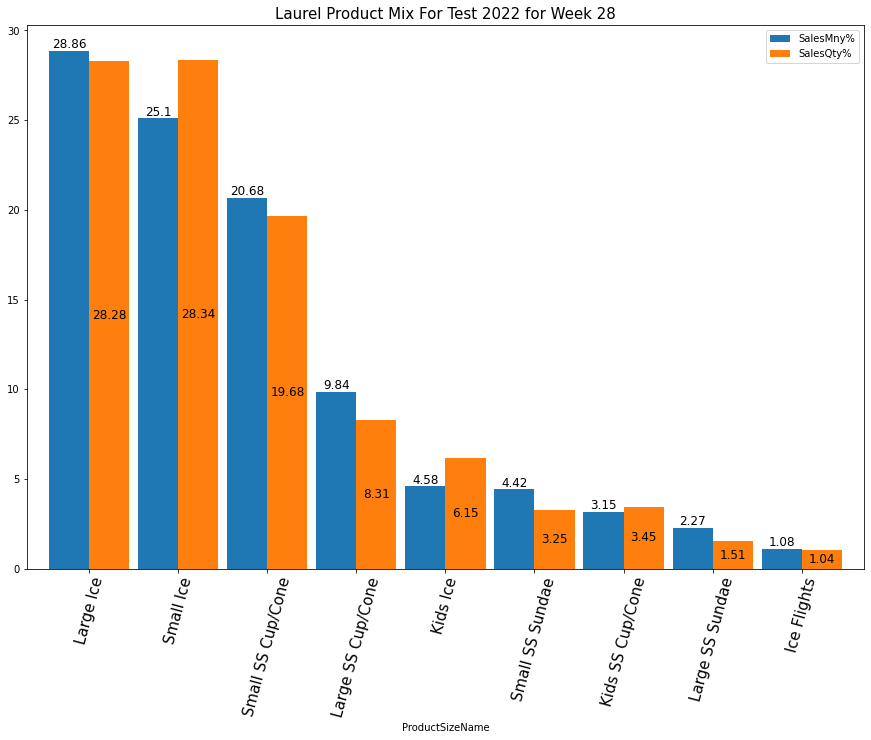

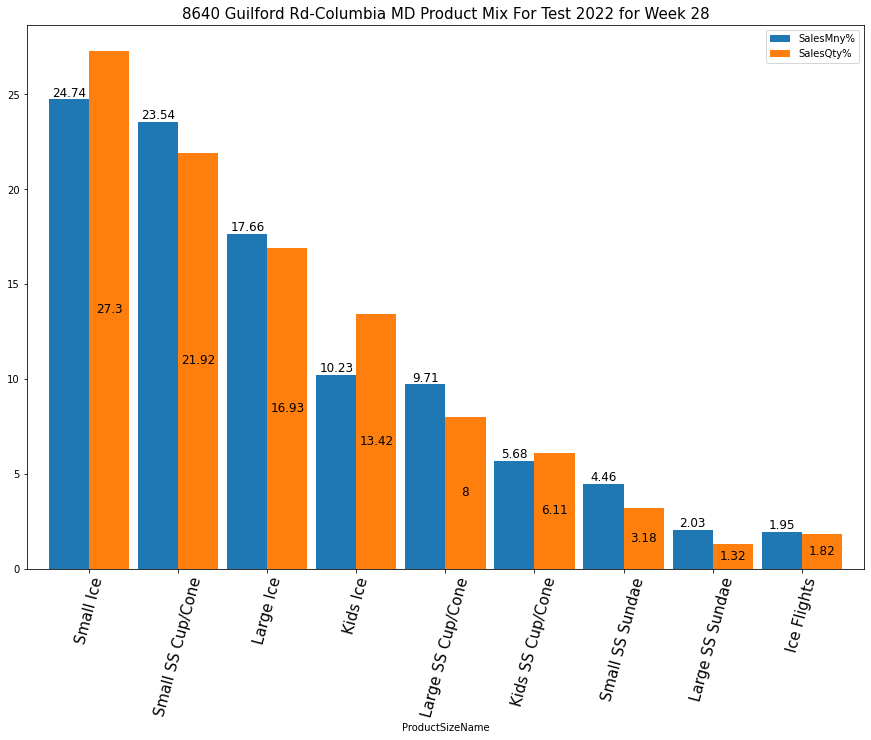

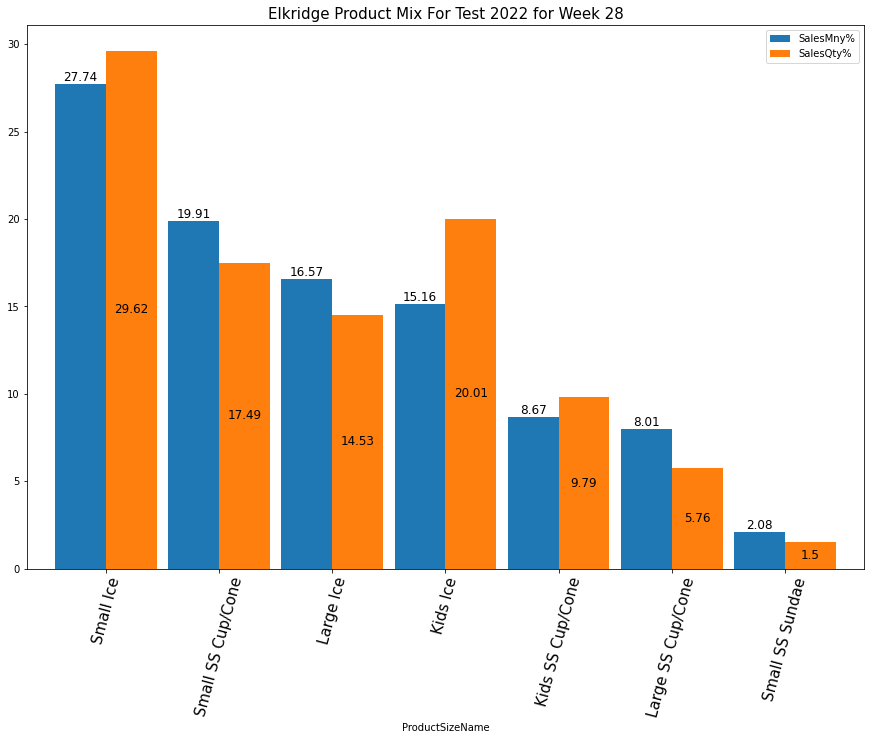

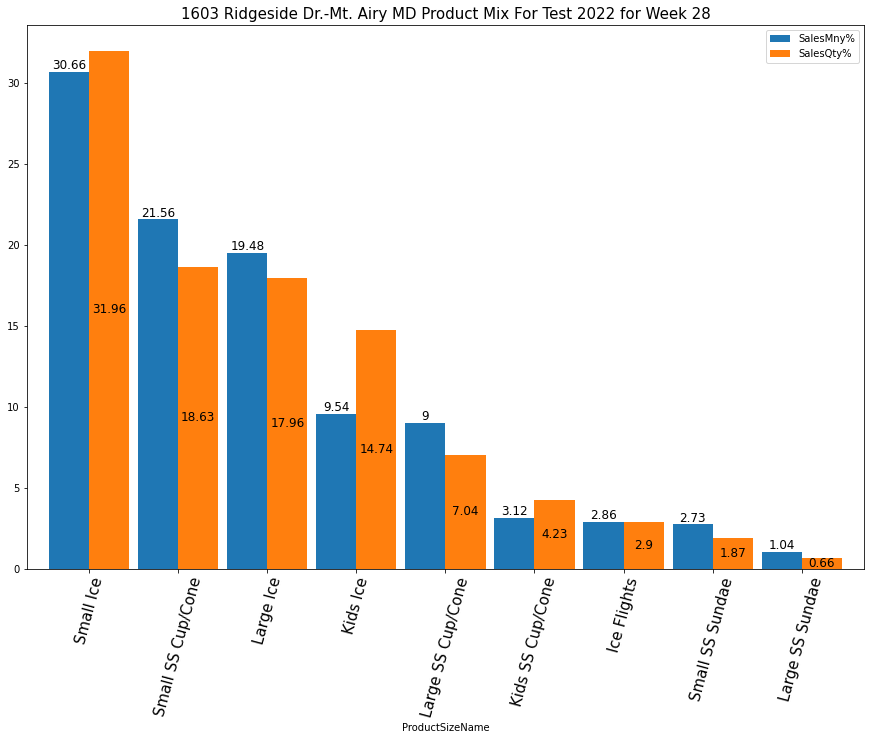

In [41]:
for i in enumerate(test_shops_22):
    plot=totals_test_22[totals_test_22.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(15,10),width=.9)
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12,label_type='center',)
    plt.title(str(i[1])+" Product Mix For Test 2022 for Week " +str(week),fontsize=15)
    plt.xticks(rotation=75,fontsize=15)

### Large Concrete-No Blendini

In [42]:
concrete=xw.Book()
sht=concrete.sheets[0]
sht.name='Large Concrete Graphs'

In [43]:
#Test, Control and Products to view
#No Shop 517
test_shops_blendini=[70,83,421,477,510,516]
control_blendini=[164,200,254,241]
products=[1159,23,87,416,454,5,1214,1222,1227,20,7,1230,1225,1216,1219,8,1221,1226,1247,1246,1229,1224,1215,1218,112,32,299,113,354]

In [44]:
#Combines 2022 Sales Data with 2023 into one dataframe
data['Year']=data.StartDate.dt.year
df['Year']=df.StartDate.dt.year
total=pd.concat([data,df])
total.tail(5)

ShopID  intStoreID  ProductCode  ProdSizeCode  DiscountCode  Register  \
372648   30445        4264           33           214           126         1   
372649   30445        4264           33           214           126         1   
372650   30445        4264           33           214           126         1   
372651   30445        4264           33           214           126         1   
372652   30445        4264           33           214           126         1   

        SalesQty  SalesMny  StartDate    EndDate  ... ShopStatus  \
372648         1    3715.0 2022-03-07 2022-03-13  ...       Open   
372649         1    3794.0 2022-03-21 2022-03-27  ...       Open   
372650         1    3797.0 2022-04-25 2022-05-01  ...       Open   
372651         1    3937.0 2022-03-07 2022-03-13  ...       Open   
372652         1    4040.0 2022-03-07 2022-03-13  ...       Open   

        LegacyShopType LegacyShopStatus ProductTypeName ProductSizeName  \
372648          Mobile  Satellite Store      MobileCart            Misc   
372649          Mobile  Satellite Store      MobileCart            Misc   
372650          Mobile  Satellite Store      MobileCart            Misc   
372651          Mobile  Satellite Store      MobileCart            Misc   
372652          Mobile  Satellite Store      MobileCart            Misc   

       SpecialVenue CoOpStatus CoOpName CoOpRate  Year  
372648           No         No      NaN      0.0  2022  
372649           No         No      NaN      0.0  2022  
372650           No         No      NaN      0.0  2022  
372651           No         No      NaN      0.0  2022  
372652           No         No      NaN      0.0  2022  

[5 rows x 26 columns]

# Looking at Cumaltive Totals for Test and Control Shops
## This is done by Years 2022 and 2023 

In [45]:
testing=total[(total.ShopID.isin(test_shops_blendini)&(total.ProdSizeCode.isin(products)))]
controling=total[(total.ShopID.isin(control_blendini)&(total.ProdSizeCode.isin(products)))]

In [46]:
conc_blendini=testing[(testing.Year==2023)&(testing.Week>=testing.Week.max()-1)].pivot_table(index='ProductSizeName',columns='Week',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()

In [47]:
conc_blendini

Week            ProductSizeName     27     28    All
0                5-Layer Gelati    288    163    451
1                      Blendini     61     69    130
2                      Concrete    427    360    787
3                   Ice Flights    100    103    203
4                      Kids Ice    591    631   1222
5              Kids SS Cup/Cone    368    388    756
6          Large Brownie Sundae      4      9     13
7                Large Concrete    178    189    367
8            Large Frozen Drink    109    106    215
9                  Large Gelati   1594   1632   3226
10                    Large Ice   1547   1518   3065
11              Large Milkshake    286    244    530
12                  Large Misto    292    311    603
13            Large SS Cup/Cone    620    563   1183
14              Large SS Sundae     99    104    203
15                    Quart Ice   1057    876   1933
16             SS Extra Custard    164    175    339
17         Small Brownie Sundae      6     18     24
18           Small Frozen Drink     71     90    161
19                 Small Gelati   1998   2133   4131
20                    Small Ice   2271   2294   4565
21              Small Milkshake    216    219    435
22                  Small Misto    242    251    493
23            Small SS Cup/Cone   1597   1578   3175
24              Small SS Sundae    182    219    401
25           Sprinkles Upcharge    988    871   1859
26            Take Home Custard     24      7     31
27    Waffle Cone/Bowl Upcharge    139    121    260
28                          All  15519  15242  30761

C:\Users\jharned\AppData\Local\Temp\ipykernel_12864\3128203840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['Perc_Change']=round((graph.iloc[:,2]-graph.iloc[:,1])/graph.iloc[:,1],2)*100


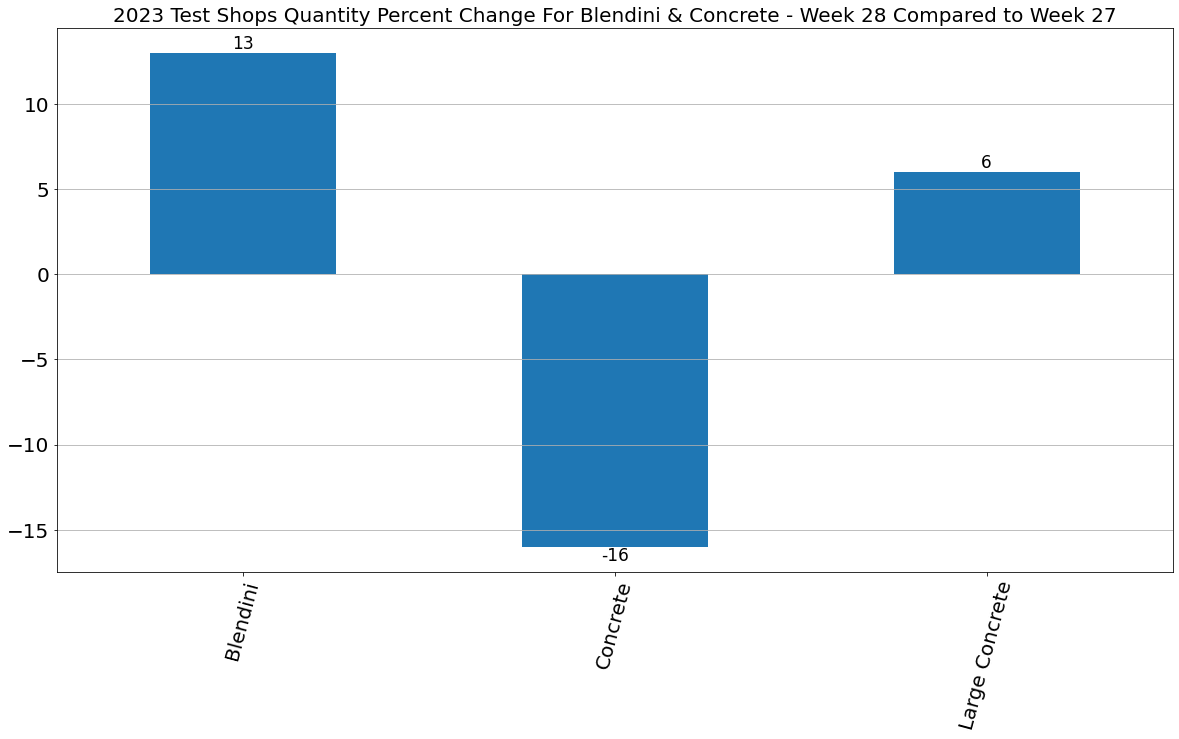

In [48]:
items=['Blendini', 'Concrete','Large Concrete']
graph=conc_blendini[conc_blendini.ProductSizeName.isin(items)]
graph['Perc_Change']=round((graph.iloc[:,2]-graph.iloc[:,1])/graph.iloc[:,1],2)*100
ax=graph['Perc_Change'].plot.bar(figsize=(20,10))
ax.set_xticklabels(graph.ProductSizeName)
ax.bar_label(ax.containers[0],fontsize=17)
plt.title('2023 Test Shops Quantity Percent Change For Blendini & Concrete - Week '+str(total.Week.max())+' Compared to Week '+str(total.Week.max()-1),fontsize=20)
plt.xticks(fontsize=20,rotation=75)
plt.grid(axis='y')
plt.yticks(fontsize=20);

In [49]:
#Large Concrete Qty
testing[(testing.Year==2023)&(testing.Week>=14)&(testing.ProductSizeName=='Large Concrete')].pivot_table(index='ShopName',columns='Week',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()

Week                              ShopName  14   15   16  17   18   19   20  \
0           250 W Camden Ave-Moorestown NJ  15   20   18   7   15   17   10   
1                3131 Rt. 38-Mt. Laurel NJ   0    0    0   0   15   32   33   
2     877 Copper Landing Rd-Cherry Hill NJ  35   31   18  20   26   19   15   
3                               Burlington   0   34   38  32   49   49   49   
4                         Ellisburg Circle   0    2    2   3   20   32   29   
5                              Willingboro  34   45   27  27   29   37   29   
6                                      All  84  132  103  89  154  186  165   

Week   21   22   23   24   25   26   27   28   All  
0      23   28   24   31   28   32   32   37   337  
1      39   30   40   27   34   22   32   39   343  
2      14   19   18   19   13   13    8   12   280  
3      56   44   45   55   60   46   60   48   665  
4      23   28   22   32   28   19   15   19   274  
5      18   34   30   45   35   26   31   34   481  
6     173  183  179  209  198  158  178  189  2380

In [50]:
# Concrete Qty
testing[(testing.Year==2023)&(testing.Week>=14)&(testing.ProductSizeName=='Concrete')].pivot_table(index='ShopName',columns='Week',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()

Week                              ShopName   14   15   16   17   18   19   20  \
0           250 W Camden Ave-Moorestown NJ   31   56   25   24   24   42   44   
1                3131 Rt. 38-Mt. Laurel NJ  118  125   96   84   76   89  116   
2     877 Copper Landing Rd-Cherry Hill NJ   37   37   36   38   41   45   49   
3                               Burlington  149  110  104   60   79  109  110   
4                         Ellisburg Circle   71   78   96   54   50   65   49   
5                              Willingboro   49   83   50   37   37   88   65   
6                                      All  455  489  407  297  307  438  433   

Week   21   22   23   24   25   26   27   28   All  
0      45   33   47   61   54   67   61   59   673  
1     101  108  130  104  105   74  116   74  1516  
2      40   28   45   43   19   23   37   22   540  
3      91  106  114   87   91   76   79   82  1447  
4      83   68   74   70   67   59   61   61  1006  
5      69   83   75   71   57   68   73   62   967  
6     429  426  485  436  393  367  427  360  6149

In [51]:
#Blendini Qty
testing[(testing.Year==2023)&(testing.Week>=14)&(testing.ProductTypeName=='Blendini')].pivot_table(index='ShopName',columns='Week',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()

Week                              ShopName  14   15  16  17  18  19  20  21  \
0                3131 Rt. 38-Mt. Laurel NJ  25   32  18  15  16  26  23  22   
1     877 Copper Landing Rd-Cherry Hill NJ  11    6   0   0   0   0   0   0   
2                               Burlington  27   26  20  11  19  30  16  13   
3                         Ellisburg Circle  14   33  16  15  12  20  21  23   
4                              Willingboro  13   22  21  10  19  16  18  17   
5                                      All  90  119  75  51  66  92  78  75   

Week   22  23  24  25  26  27  28   All  
0      23  23   8  20  17  11  19   298  
1       0   0   0   0   0   0   0    17  
2      36  31  20  17  25  21  21   333  
3      22   9  23  15  16  16  18   273  
4      27  17  27   5  11  13  11   247  
5     108  80  78  57  69  61  69  1168

In [52]:
testing_pivot=testing.pivot_table(index='ProductTypeName',columns='Year',values='SalesQty',aggfunc='sum',fill_value=0,margins=True).reset_index()
control_pivot=controling.pivot_table(index='ProductTypeName',columns='Year',values='SalesQty',aggfunc='sum',margins=True).reset_index()

In [53]:
testing_pivot

Year ProductTypeName    2022    2023     All
0           Blendini    2709    1498    4207
1           Concrete    9478   10433   19911
2            Custard   57877   56734  114611
3      Frozen Drinks    3382    2620    6002
4             Gelati   60843   60012  120855
5        Italian Ice   86065   83703  169768
6         Milkshakes    7517    7385   14902
7              Misto    9559    9049   18608
8          Sprinkles   17962   17269   35231
9                All  255392  248703  504095

In [54]:
control_pivot

Year ProductTypeName    2022    2023     All
0           Blendini    5086    4217    9303
1           Concrete   18232   18134   36366
2            Custard   66766   70524  137290
3      Frozen Drinks    2944    2713    5657
4             Gelati   65207   68011  133218
5        Italian Ice   82229   82486  164715
6         Milkshakes    9120    9089   18209
7              Misto   10034    9548   19582
8          Sprinkles   22232   24269   46501
9                All  281850  288991  570841

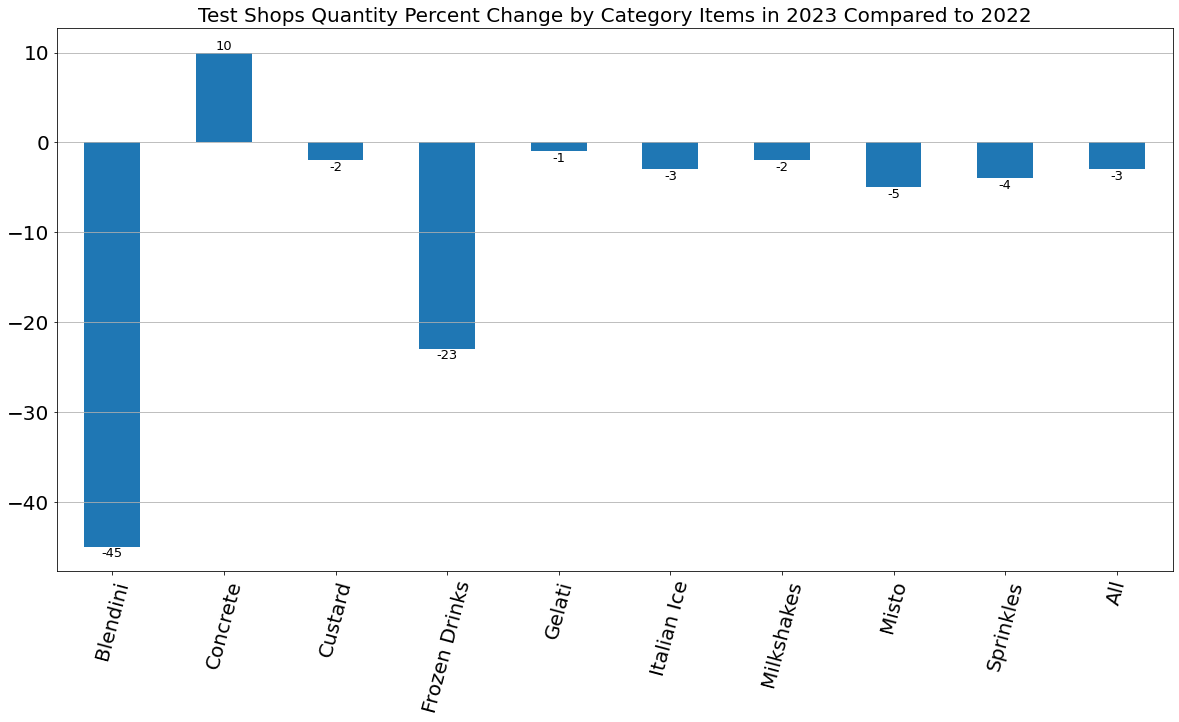

In [55]:
testing_pivot['Perc_Change']=round((testing_pivot.iloc[:,2]-testing_pivot.iloc[:,1])/testing_pivot.iloc[:,1],2)*100
ax=testing_pivot['Perc_Change'].plot.bar(figsize=(20,10))
ax.set_xticklabels(testing_pivot.ProductTypeName)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title('Test Shops Quantity Percent Change by Category Items in '+str(total.Year.max())+' Compared to '+str(total.Year.min()),fontsize=20)
plt.xticks(fontsize=20,rotation=75)
plt.grid(axis='y')
plt.yticks(fontsize=20);

In [56]:
testing_pivot

Year ProductTypeName    2022    2023     All  Perc_Change
0           Blendini    2709    1498    4207        -45.0
1           Concrete    9478   10433   19911         10.0
2            Custard   57877   56734  114611         -2.0
3      Frozen Drinks    3382    2620    6002        -23.0
4             Gelati   60843   60012  120855         -1.0
5        Italian Ice   86065   83703  169768         -3.0
6         Milkshakes    7517    7385   14902         -2.0
7              Misto    9559    9049   18608         -5.0
8          Sprinkles   17962   17269   35231         -4.0
9                All  255392  248703  504095         -3.0

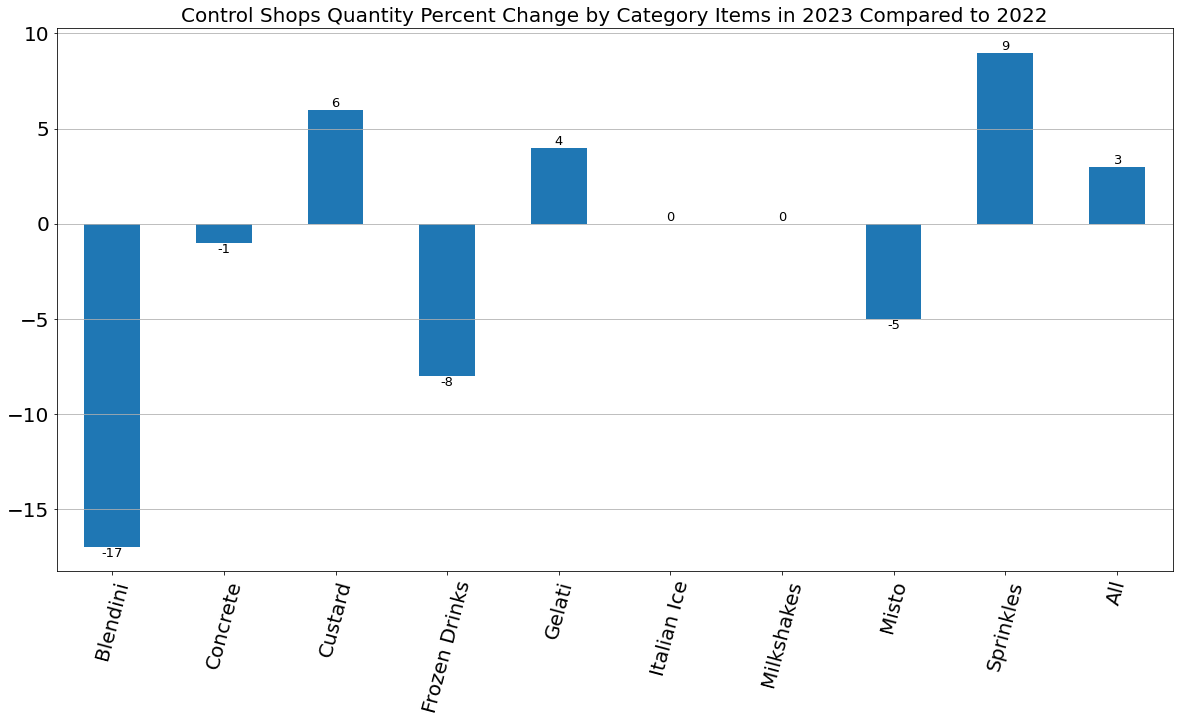

In [57]:
control_pivot['Perc_Change']=round((control_pivot.iloc[:,2]-control_pivot.iloc[:,1])/control_pivot.iloc[:,1],2)*100
ax=control_pivot['Perc_Change'].plot.bar(figsize=(20,10))
ax.set_xticklabels(control_pivot.ProductTypeName)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title('Control Shops Quantity Percent Change by Category Items in '+str(total.Year.max())+' Compared to '+str(total.Year.min()),fontsize=20)
plt.xticks(fontsize=20,rotation=75)
plt.grid(axis='y')
plt.yticks(fontsize=20);

In [58]:
#Gets the Test and Control Shops by specific Years
test_2022=total[(total.ShopID.isin(test_shops_blendini))&(total.ProdSizeCode.isin(products))&(total.Year==2022)]
test_2023=total[(total.ShopID.isin(test_shops_blendini))&(total.ProdSizeCode.isin(products))&(total.Year==2023)]
control_2022=total[(total.ShopID.isin(control_blendini))&(total.ProdSizeCode.isin(products))&(total.Year==2022)]
control_2023=total[(total.ShopID.isin(control_blendini))&(total.ProdSizeCode.isin(products))&(total.Year==2023)]

In [59]:
control_2022.ProductSizeName.unique()

array(['Kids Ice', 'Large Ice', 'Quart Ice', 'Ice Flights', 'Small Ice',
       'Large Gelati', '5-Layer Gelati', 'Small Gelati', 'Small Misto',
       'Large Misto', 'SS Extra Custard', 'Sprinkles Upcharge',
       'Take Home Custard', 'Fresh Baked Waffle Cone/Bowl',
       'Kids SS Cup/Cone', 'Small SS Cup/Cone', 'Large SS Cup/Cone',
       'Small SS Sundae', 'Large SS Sundae', 'Blendini', 'Concrete',
       'Small Milkshake', 'Large Milkshake', 'Small Frozen Drink',
       'Large Frozen Drink', 'Waffle Cone/Bowl Upcharge',
       'Small Brownie Sundae', 'Large Brownie Sundae'], dtype=object)

In [60]:
#Groups the Test and Control Shop Sales and Quantity by Product and then gets overall sales percentage
plot_1=test_2022.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sort_values(by='SalesMny',ascending=False).reset_index()
plot_2=test_2023.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sort_values(by='SalesMny',ascending=False).reset_index()
plot_3=control_2022.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sort_values(by='SalesMny',ascending=False).reset_index()
plot_4=control_2023.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sort_values(by='SalesMny',ascending=False).reset_index()
test_2022_totals=test_2022.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sum()
test_2023_totals=test_2023.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sum()
control_2022_totals=control_2022.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sum()
control_2023_totals=control_2023.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().sum()

In [61]:
#Test Shops 2022
plot_1['Sales%']=round((plot_1['SalesMny']/test_2022_totals[0])*100,2)
plot_1['Qty%']=round((plot_1['SalesQty']/test_2022_totals[1])*100,2)
plot_1.iloc[:,3:5].sort_values(by='Sales%',ascending=False)
plot_1=plot_1[plot_1['Sales%'] >1]

In [62]:
plot_1

ProductSizeName    SalesMny  SalesQty  Sales%   Qty%
0         Small Gelati  141639.060     31650   13.57  12.39
1         Large Gelati  136422.404     26980   13.07  10.56
2            Small Ice  120422.160     35894   11.54  14.05
3    Small SS Cup/Cone  110870.030     27434   10.62  10.74
4            Large Ice   95827.395     24038    9.18   9.41
5            Quart Ice   91015.612     13828    8.72   5.41
6             Concrete   54288.370      9478    5.20   3.71
7    Large SS Cup/Cone   53476.484     11144    5.12   4.36
8             Kids Ice   28152.941     10776    2.70   4.22
9          Large Misto   26801.253      5268    2.57   2.06
10    Kids SS Cup/Cone   23831.728      7511    2.28   2.94
11     Large Milkshake   21533.795      3822    2.06   1.50
12         Small Misto   19529.054      4291    1.87   1.68
13     Small Milkshake   18125.795      3695    1.74   1.45
14     Small SS Sundae   17717.012      3484    1.70   1.36
15  Sprinkles Upcharge   14773.546     17962    1.42   7.03
16            Blendini   13944.979      2709    1.34   1.06
17      5-Layer Gelati   12895.870      2213    1.24   0.87
18     Large SS Sundae   10814.460      1912    1.04   0.75

In [63]:
#Test Shops 2023
plot_2['Sales%']=round((plot_2['SalesMny']/test_2023_totals[0])*100,2)
plot_2['Qty%']=round((plot_2['SalesQty']/test_2023_totals[1])*100,2)
plot_2.iloc[:,3:5].sort_values(by='Sales%',ascending=False)
plot_2=plot_2[plot_2['Sales%'] >1]


In [64]:
#Control Shops 2022
plot_3['Sales%']=round((plot_3['SalesMny']/control_2022_totals[0])*100,2)
plot_3['Qty%']=round((plot_3['SalesQty']/control_2022_totals[1])*100,2)
plot_3.iloc[:,3:5].sort_values(by='Sales%',ascending=False)
plot_3=plot_3[plot_3['Sales%'] >1]

In [65]:
#Control Shops 2023
plot_4['Sales%']=round((plot_4['SalesMny']/control_2023_totals[0])*100,2)
plot_4['Qty%']=round((plot_4['SalesQty']/control_2023_totals[1])*100,2)
plot_4.iloc[:,3:5].sort_values(by='Sales%',ascending=False)
plot_4=plot_4[plot_4['Sales%'] >1]

In [66]:
plot_4

ProductSizeName     SalesMny  SalesQty  Sales%   Qty%
0         Small Gelati  191741.5565     37920   14.67  13.12
1    Small SS Cup/Cone  163031.3895     35143   12.47  12.16
2         Large Gelati  146772.9320     26361   11.23   9.12
3            Small Ice  141797.7695     35768   10.85  12.38
4             Concrete  113309.3800     18134    8.67   6.27
5            Quart Ice   91200.5090     14950    6.98   5.17
6            Large Ice   81791.0030     18414    6.26   6.37
7    Large SS Cup/Cone   63602.0242     12343    4.87   4.27
8     Kids SS Cup/Cone   32990.1535      9125    2.52   3.16
9             Kids Ice   31457.3490     11006    2.41   3.81
10     Small Milkshake   28957.6450      5121    2.22   1.77
11         Large Misto   26681.7470      4800    2.04   1.66
12     Large Milkshake   26046.3090      3968    1.99   1.37
13     Small SS Sundae   25979.2660      4248    1.99   1.47
14         Small Misto   23993.7925      4748    1.84   1.64
15      5-Layer Gelati   22789.2610      3730    1.74   1.29
16            Blendini   22616.4930      4217    1.73   1.46
17  Sprinkles Upcharge   19525.5475     24269    1.49   8.40

# These are the Graphs Plotting Sales and Quantity Sold in Percent
## Control and Test are plotted by Year (2022, 2023)

''

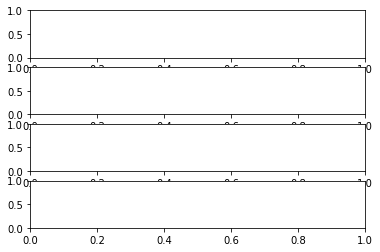

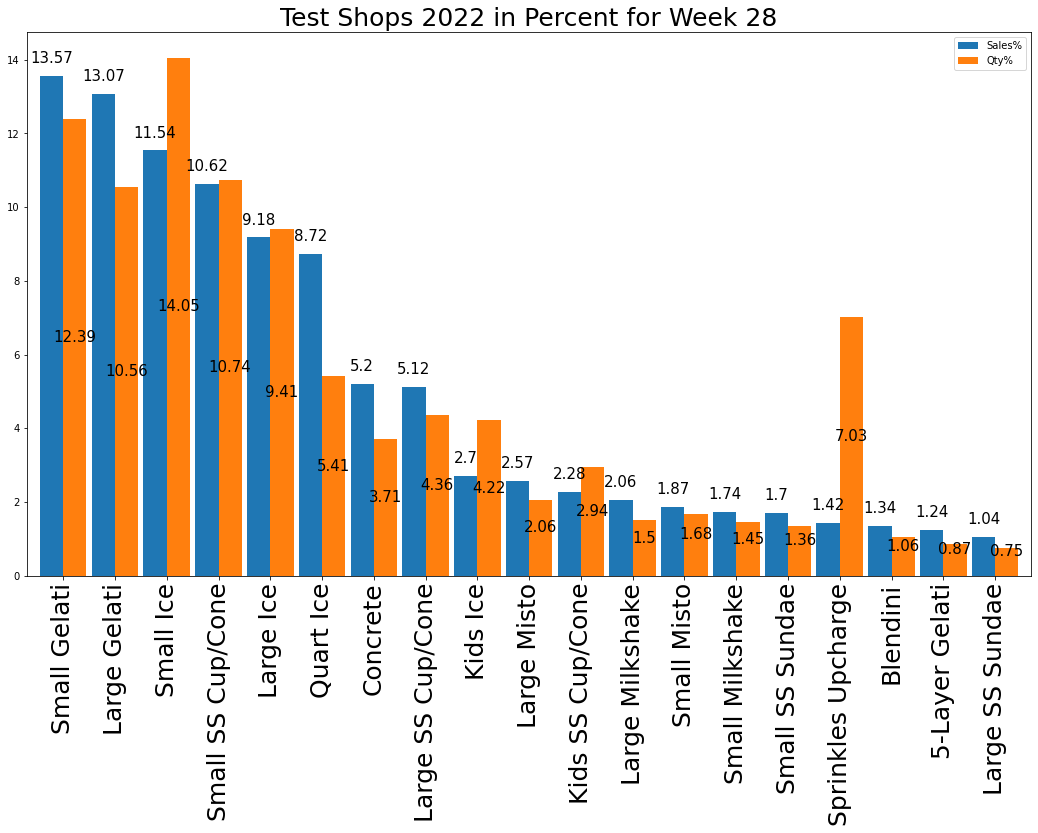

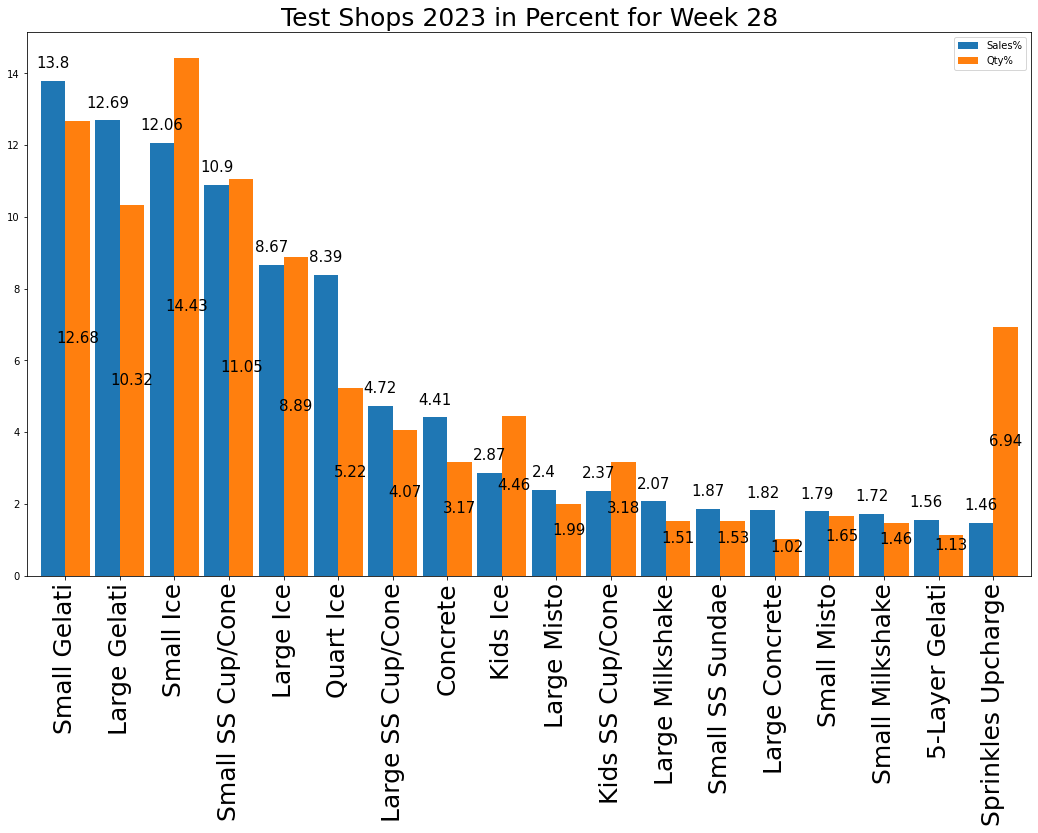

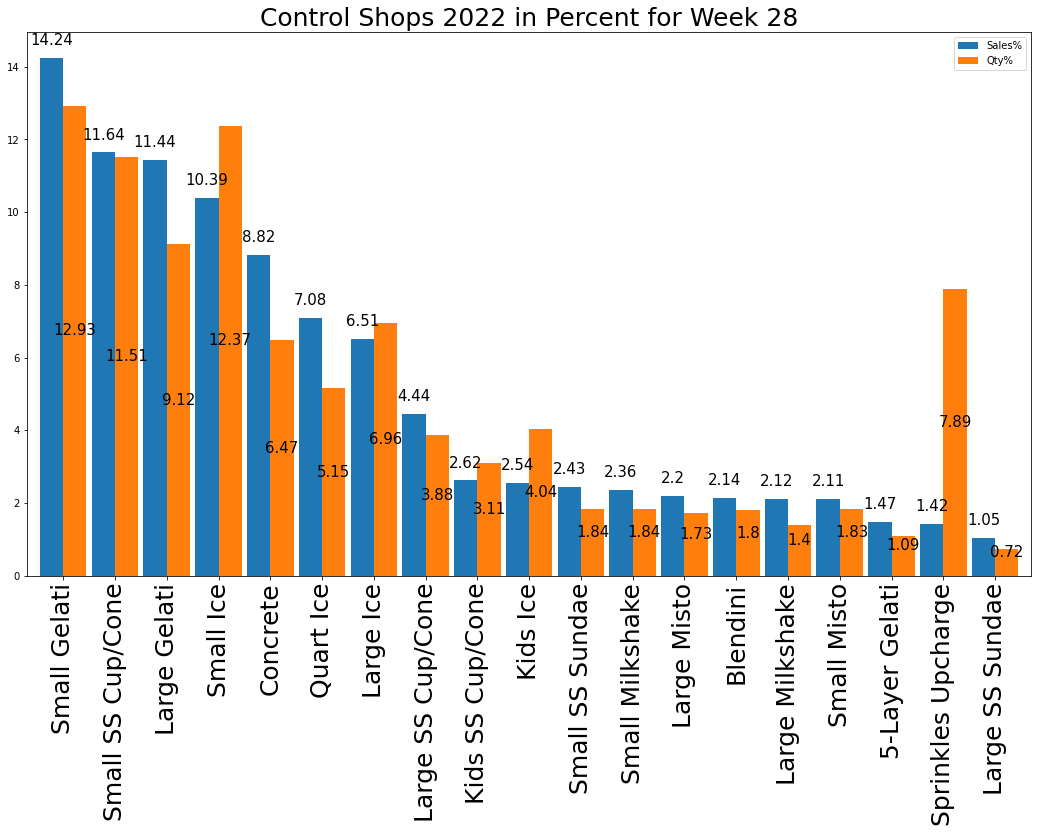

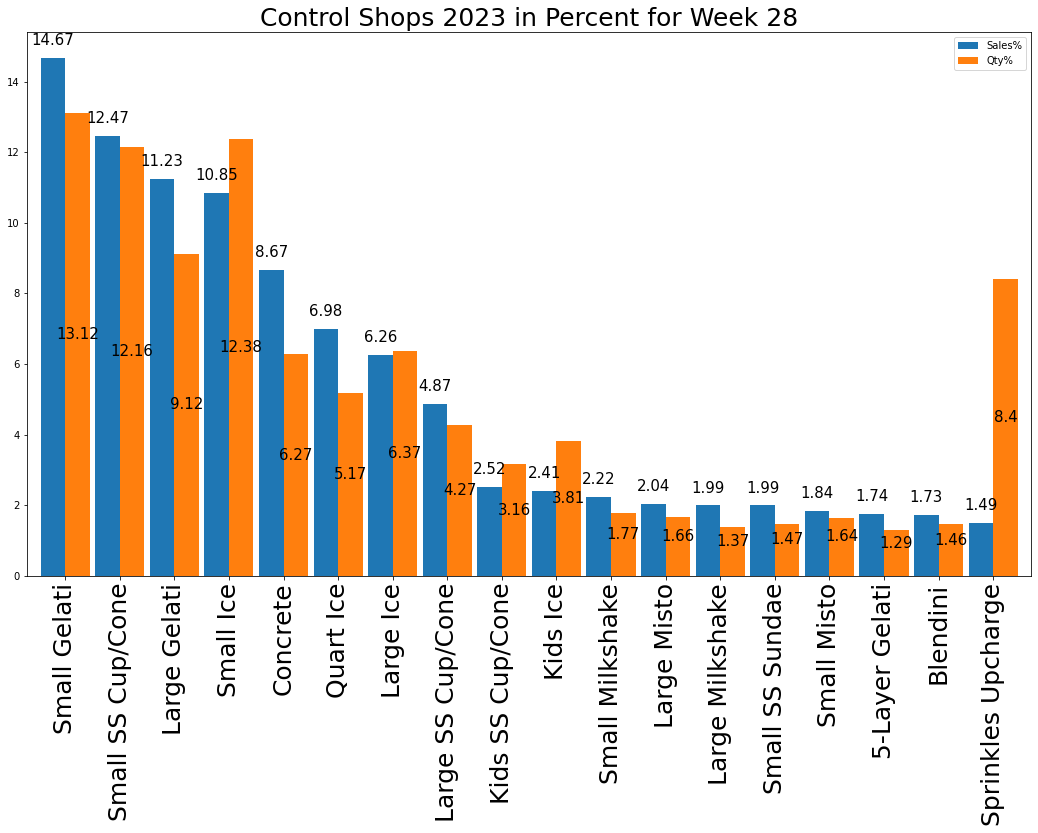

In [67]:
#Plots control and test shops by year for comparsion
fig,axs=plt.subplots(4)
axs.flatten()
axs[0]=plot_1.iloc[:,3:5].sort_values(by='Sales%',ascending=False).plot.bar(figsize=(18,10),width=.9)
axs[0].set_xticklabels(plot_1.ProductSizeName,fontsize=25)
axs[0].bar_label(axs[0].containers[0],fontsize=15,label_type='edge',padding=10)
axs[0].bar_label(axs[0].containers[1],fontsize=15,label_type='center',padding=10)
axs[0].set_title('Test Shops 2022 in Percent for Week '+str(week),fontsize=25)
axs[1]=plot_2.iloc[:,3:5].sort_values(by='Sales%',ascending=False).plot.bar(figsize=(18,10),width=.9)
axs[1].set_xticklabels(plot_2.ProductSizeName,fontsize=25)
axs[1].bar_label(axs[1].containers[0],fontsize=15,label_type='edge',padding=10)
axs[1].bar_label(axs[1].containers[1],fontsize=15,label_type='center',padding=10)
axs[1].set_title('Test Shops 2023 in Percent for Week '+str(week),fontsize=25)
axs[2]=plot_3.iloc[:,3:5].sort_values(by='Sales%',ascending=False).plot.bar(figsize=(18,10),width=.9)
axs[2].set_xticklabels(plot_3.ProductSizeName,fontsize=25)
axs[2].bar_label(axs[2].containers[0],fontsize=15,label_type='edge',padding=10)
axs[2].bar_label(axs[2].containers[1],fontsize=15,label_type='center',padding=10)
axs[2].set_title('Control Shops 2022 in Percent for Week '+str(week),fontsize=25)
axs[3]=plot_4.iloc[:,3:5].sort_values(by='Sales%',ascending=False).plot.bar(figsize=(18,10),width=.9)
axs[3].set_xticklabels(plot_4.ProductSizeName,fontsize=25)
axs[3].bar_label(axs[3].containers[0],fontsize=15,label_type='edge',padding=10)
axs[3].bar_label(axs[3].containers[1],fontsize=15,label_type='center',padding=10)
axs[3].set_title('Control Shops 2023 in Percent for Week '+str(week),fontsize=25)
;


In [68]:
#Saves Plots to Excel
fig_0=axs[0].get_figure()
sht.pictures.add(fig_0,name='Pandas_1',left=-sht.range('A4').left,top=sht.range('A4').top,height=500,width=500)
fig_1=axs[1].get_figure()
sht.pictures.add(fig_1,name='Pandas_2',left=-sht.range('A34').left,top=sht.range('A34').top,height=500,width=500)
fig_2=axs[2].get_figure()
sht.pictures.add(fig_2,name='Pandas_3',left=-sht.range('M4').left,top=sht.range('M4').top,height=500,width=500)
fig_3=axs[3].get_figure()
sht.pictures.add(fig_3,name='Pandas_4',left=-sht.range('M34').left,top=sht.range('M34').top,height=500,width=500)

<Picture 'Pandas_4' in <Sheet [Book2]Large Concrete Graphs>>

# Test Shops by Location

In [69]:
#Groups the Products by Shop to get sales and quantity
totals_control_23=control_2023.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()
totals_control_22=control_2022.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()


In [70]:
#Gets the sum of sales and quantity by shop
control_totals_23=control_2023.groupby('ShopName')[['SalesMny','SalesQty']].sum().reset_index()
control_totals_22=control_2022.groupby('ShopName')[['SalesMny','SalesQty']].sum().reset_index()


In [71]:
totals_control_23

ShopName               ProductSizeName    SalesMny  \
0    125 N Maple Ave-Evesham NJ                5-Layer Gelati   5277.1900   
1    125 N Maple Ave-Evesham NJ                      Blendini   4696.9500   
2    125 N Maple Ave-Evesham NJ                      Concrete  27418.7710   
3    125 N Maple Ave-Evesham NJ  Fresh Baked Waffle Cone/Bowl    829.4700   
4    125 N Maple Ave-Evesham NJ                   Ice Flights   2429.2465   
..                          ...                           ...         ...   
97                     Voorhees             Small SS Cup/Cone  53159.2310   
98                     Voorhees               Small SS Sundae  11104.1500   
99                     Voorhees            Sprinkles Upcharge   8002.1700   
100                    Voorhees             Take Home Custard    416.1600   
101                    Voorhees     Waffle Cone/Bowl Upcharge   1127.0600   

     SalesQty  
0         885  
1         910  
2        4373  
3         643  
4         445  
..        ...  
97      10262  
98       1686  
99       8088  
100        26  
101      1034  

[102 rows x 4 columns]

In [72]:
#Gets the Sales and QTY % of Product for Controls Shops in 2023 and 2022
totals_control_23['SalesMny%']=totals_control_23.apply(lambda x,: round(x['SalesMny']/control_totals_23.at[0,'SalesMny']*100,2) if x['ShopName']==control_totals_23.at[0,'ShopName'] else
round(x['SalesMny']/control_totals_23.at[1,'SalesMny']*100,2) if x['ShopName']==control_totals_23.at[1,'ShopName'] else
round(x['SalesMny']/control_totals_23.at[2,'SalesMny']*100,2) if x['ShopName']==control_totals_23.at[2,'ShopName'] else 
round(x['SalesMny']/control_totals_23.at[3,'SalesMny']*100,2) if x['ShopName']==control_totals_23.at[3,'ShopName'] else 0, axis=1)

totals_control_23['SalesQty%']=totals_control_23.apply(lambda x,: round(x['SalesQty']/control_totals_23.at[0,'SalesQty']*100,2) if x['ShopName']==control_totals_23.at[0,'ShopName'] else
round(x['SalesQty']/control_totals_23.at[1,'SalesQty']*100,2) if x['ShopName']==control_totals_23.at[1,'ShopName'] else
round(x['SalesQty']/control_totals_23.at[2,'SalesQty']*100,2) if x['ShopName']==control_totals_23.at[2,'ShopName'] else 
round(x['SalesQty']/control_totals_23.at[3,'SalesQty']*100,2) if x['ShopName']==control_totals_23.at[3,'ShopName'] else 0,axis=1)
                                                       
totals_control_22['SalesMny%']=totals_control_22.apply(lambda x,: round(x['SalesMny']/control_totals_22.at[0,'SalesMny']*100,2) if x['ShopName']==control_totals_22.at[0,'ShopName'] else
round(x['SalesMny']/control_totals_22.at[1,'SalesMny']*100,2) if x['ShopName']==control_totals_22.at[1,'ShopName'] else
round(x['SalesMny']/control_totals_22.at[2,'SalesMny']*100,2) if x['ShopName']==control_totals_22.at[2,'ShopName'] else 
round(x['SalesMny']/control_totals_22.at[3,'SalesMny']*100,2) if x['ShopName']==control_totals_22.at[3,'ShopName'] else 0, axis=1)

totals_control_22['SalesQty%']=totals_control_22.apply(lambda x,: round(x['SalesQty']/control_totals_22.at[0,'SalesQty']*100,2) if x['ShopName']==control_totals_22.at[0,'ShopName'] else
round(x['SalesQty']/control_totals_22.at[1,'SalesQty']*100,2) if x['ShopName']==control_totals_22.at[1,'ShopName'] else
round(x['SalesQty']/control_totals_22.at[2,'SalesQty']*100,2) if x['ShopName']==control_totals_22.at[2,'ShopName'] else 
round(x['SalesQty']/control_totals_22.at[3,'SalesQty']*100,2) if x['ShopName']==control_totals_22.at[3,'ShopName'] else 0, axis=1)

In [73]:
#Filters only Products who have sold over 1%
totals_control_23.drop(['SalesMny','SalesQty'],axis=1,inplace=True)
totals_control_23=totals_control_23[totals_control_23['SalesMny%']>1].sort_values(by='SalesMny%', ascending=False)

In [74]:
#Filters only Products who have sold over 1%
totals_control_22.drop(['SalesMny','SalesQty'],axis=1,inplace=True)
totals_control_22=totals_control_22[totals_control_22['SalesMny%']>1].sort_values(by='SalesMny%', ascending=False)

In [75]:
#Creates a list of Shop Names in both the Control Groups for 2023 and 2022
control_shops_23=list(control_2023.ShopName.unique())
control_shops_22=list(control_2022.ShopName.unique())

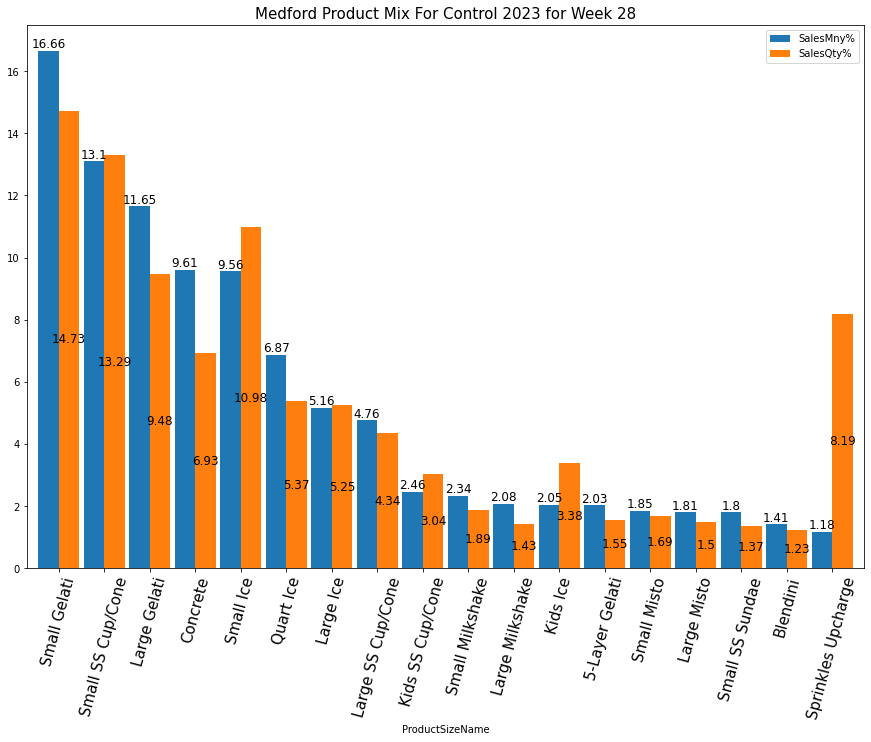

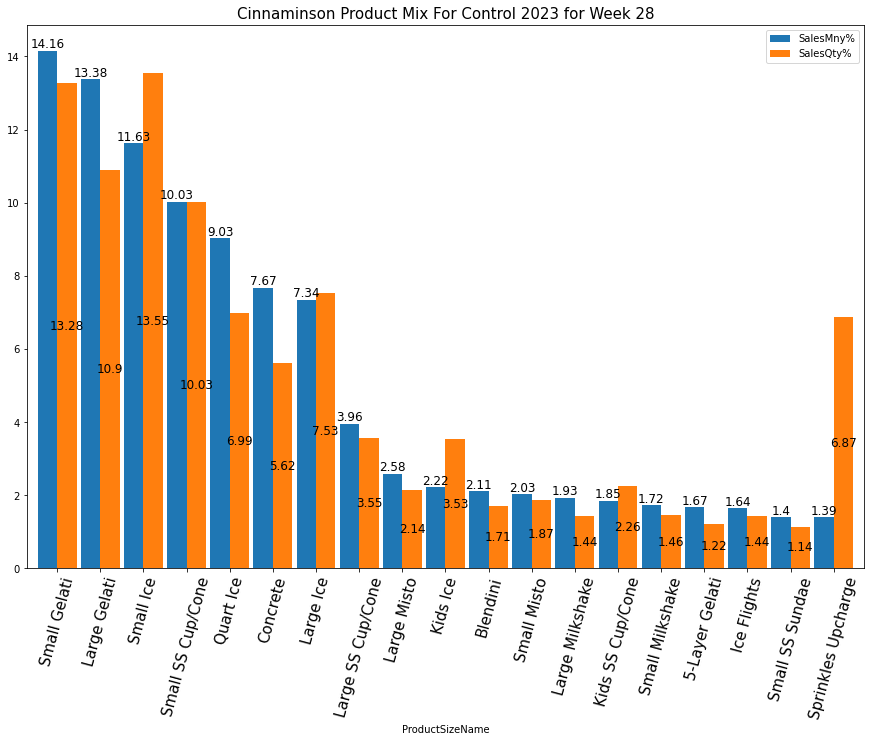

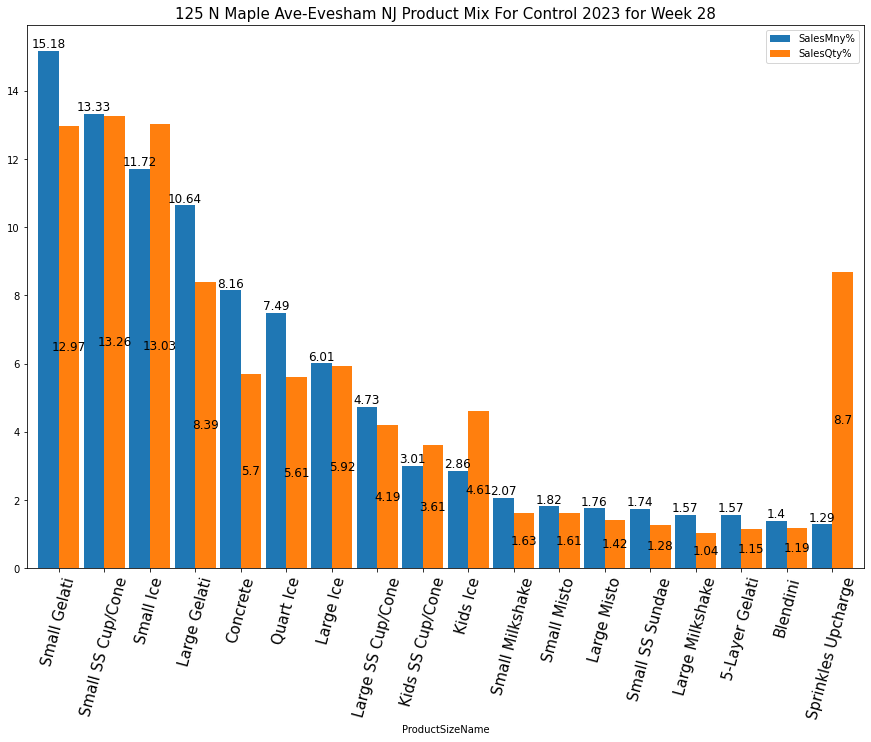

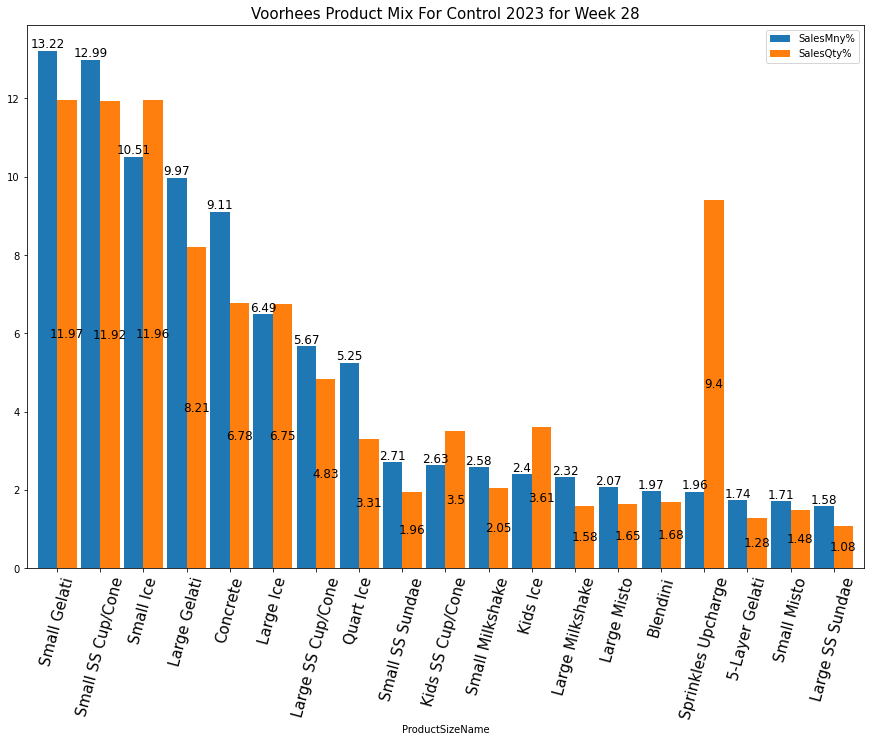

In [76]:
for i in enumerate(control_shops_23):
    plot=totals_control_23[totals_control_23.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(15,10),width=.9)
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12,label_type='center',)
    plt.title(str(i[1])+" Product Mix For Control 2023 for Week " +str(week),fontsize=15)
    plt.xticks(rotation=75,fontsize=15)

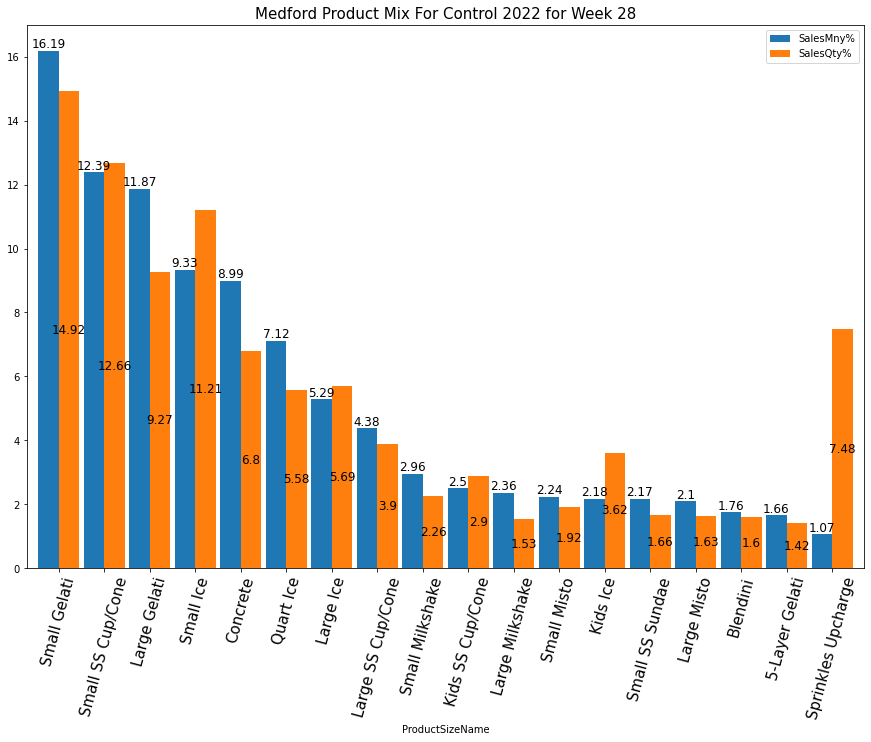

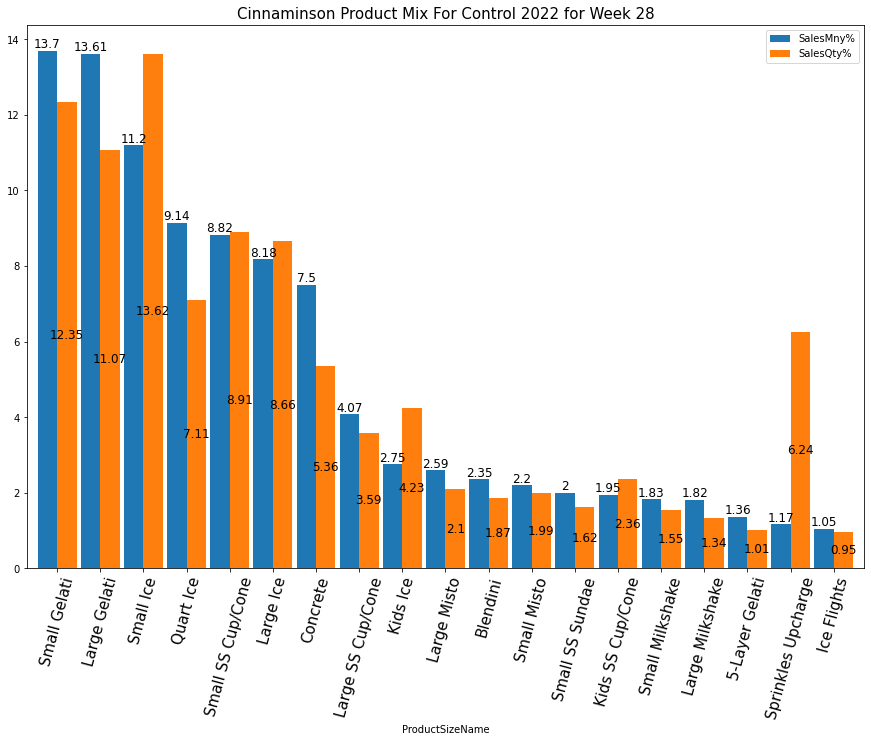

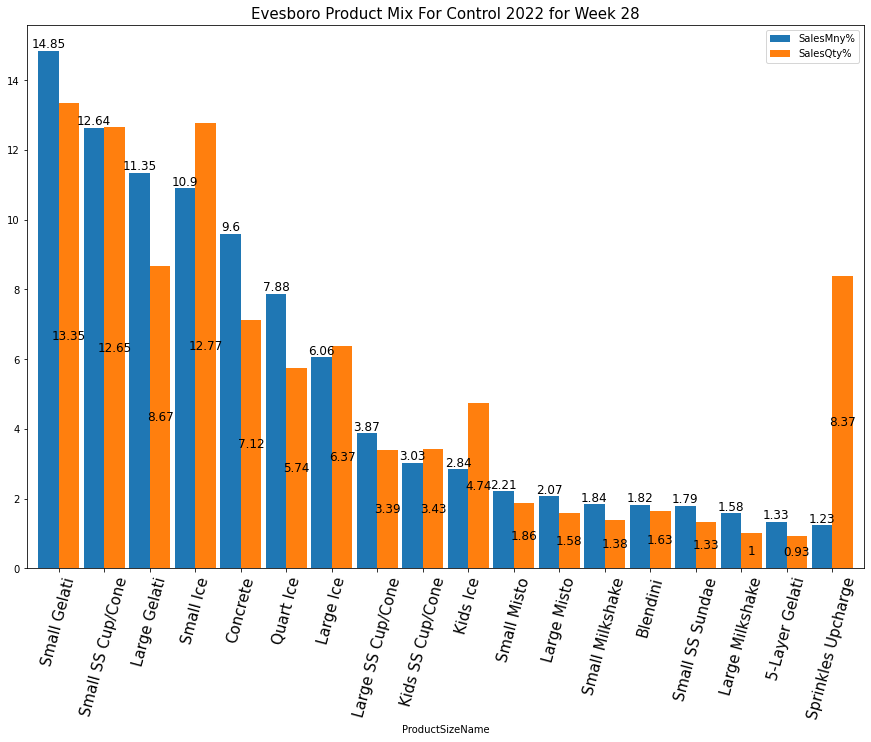

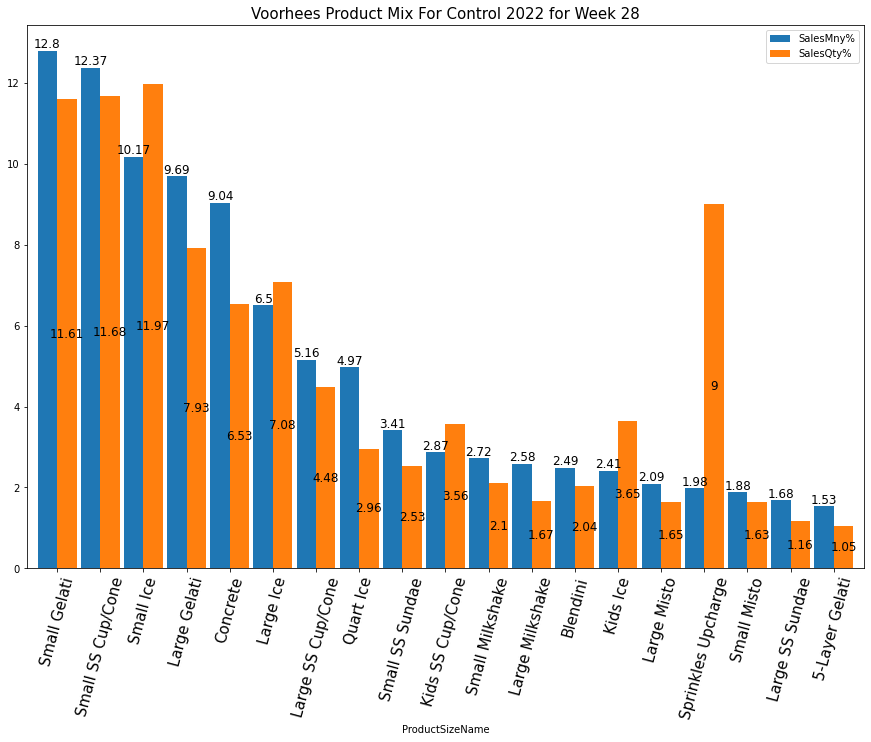

In [77]:
for i in enumerate(control_shops_22):
    plot=totals_control_22[totals_control_22.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(15,10),width=.9)
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12,label_type='center',)
    plt.title(str(i[1])+" Product Mix For Control 2022 for Week " +str(week),fontsize=15)
    plt.xticks(rotation=75,fontsize=15)

In [78]:
#Groups the Products by Shop to get sales and quantity
totals_test_23=test_2023.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()
totals_test_22=test_2022.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()

In [79]:
test_totals_22

ShopName    SalesMny  SalesQty
0    1603 Ridgeside Dr.-Mt. Airy MD  56855.1250     14029
1  210 Kent Landing-Stevensville MD  79464.3270     19210
2      8640 Guilford Rd-Columbia MD  70524.1685     16069
3                      Burtonsville  52877.9100     15974
4                          Elkridge  68577.8860     17440
5                 Harpers Farm Road  64707.4150     14724
6                            Laurel  85670.8115     19201

In [80]:
#Gets the sum of sales and quantity by shop
test_totals_23=test_2023.groupby('ShopName')[['SalesMny','SalesQty']].sum().reset_index()
test_totals_22=test_2022.groupby('ShopName')[['SalesMny','SalesQty']].sum().reset_index()
test_totals_23

ShopName     SalesMny  SalesQty
0        250 W Camden Ave-Moorestown NJ   96149.0530     22170
1             3131 Rt. 38-Mt. Laurel NJ  189798.5150     41235
2  877 Copper Landing Rd-Cherry Hill NJ  127032.4240     27870
3                            Burlington  235885.0600     54915
4                      Ellisburg Circle  175594.4915     42516
5                           Willingboro  259063.9120     59997

In [81]:
#Gets the Sales and QTY % of Product for Test Shops in 2023 and 2022
totals_test_23['SalesMny%']=totals_test_23.apply(lambda x,: round(x['SalesMny']/test_totals_23.at[0,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[0,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[1,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[1,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[2,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[2,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[3,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[3,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[4,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[4,'ShopName'] else
round(x['SalesMny']/test_totals_23.at[5,'SalesMny']*100,2) if x['ShopName']==test_totals_23.at[5,'ShopName'] else 0, axis=1)


totals_test_23['SalesQty%']=totals_test_23.apply(lambda x,: round(x['SalesQty']/test_totals_23.at[0,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[0,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[1,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[1,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[2,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[2,'ShopName'] else 
round(x['SalesQty']/test_totals_23.at[3,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[3,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[4,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[4,'ShopName'] else
round(x['SalesQty']/test_totals_23.at[5,'SalesQty']*100,2) if x['ShopName']==test_totals_23.at[5,'ShopName'] else 0, axis=1)                                          

totals_test_22['SalesMny%']=totals_test_22.apply(lambda x,: round(x['SalesMny']/test_totals_22.at[0,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[0,'ShopName'] else
round(x['SalesMny']/test_totals_22.at[1,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[1,'ShopName'] else
round(x['SalesMny']/test_totals_22.at[2,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[2,'ShopName'] else
round(x['SalesMny']/test_totals_22.at[3,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[3,'ShopName'] else
round(x['SalesMny']/test_totals_22.at[4,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[4,'ShopName'] else 
round(x['SalesMny']/test_totals_22.at[5,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[5,'ShopName'] else
round(x['SalesMny']/test_totals_22.at[6,'SalesMny']*100,2) if x['ShopName']==test_totals_22.at[6,'ShopName'] else 0, axis=1)
                                                 
totals_test_22['SalesQty%']=totals_test_22.apply(lambda x,: round(x['SalesQty']/test_totals_22.at[0,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[0,'ShopName'] else
round(x['SalesQty']/test_totals_22.at[1,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[1,'ShopName'] else
round(x['SalesQty']/test_totals_22.at[2,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[2,'ShopName'] else
round(x['SalesQty']/test_totals_22.at[3,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[3,'ShopName'] else
round(x['SalesQty']/test_totals_22.at[4,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[4,'ShopName'] else
round(x['SalesQty']/test_totals_22.at[5,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[5,'ShopName'] else 
round(x['SalesQty']/test_totals_22.at[6,'SalesQty']*100,2) if x['ShopName']==test_totals_22.at[6,'ShopName'] else 0, axis=1)

In [82]:
totals_test_23[totals_test_23.ProductSizeName=='Large Concrete']

ShopName ProductSizeName  SalesMny  SalesQty  \
6          250 W Camden Ave-Moorestown NJ  Large Concrete   2775.03       397   
33              3131 Rt. 38-Mt. Laurel NJ  Large Concrete   2740.57       343   
58   877 Copper Landing Rd-Cherry Hill NJ  Large Concrete   2741.95       305   
84                             Burlington  Large Concrete   4980.85       665   
110                      Ellisburg Circle  Large Concrete   1860.46       274   
137                           Willingboro  Large Concrete   4617.53       558   

     SalesMny%  SalesQty%  
6         2.89       1.79  
33        1.44       0.83  
58        2.16       1.09  
84        2.11       1.21  
110       1.06       0.64  
137       1.78       0.93

In [83]:
totals_test_22

ShopName            ProductSizeName   SalesMny  \
0    250 W Camden Ave-Moorestown NJ             5-Layer Gelati   1396.548   
1    250 W Camden Ave-Moorestown NJ                   Blendini   2090.079   
2    250 W Camden Ave-Moorestown NJ                   Concrete   8711.310   
3    250 W Camden Ave-Moorestown NJ                Ice Flights   1337.680   
4    250 W Camden Ave-Moorestown NJ                   Kids Ice   3502.102   
..                              ...                        ...        ...   
174                     Willingboro          Small SS Cup/Cone  18030.925   
175                     Willingboro            Small SS Sundae   3626.573   
176                     Willingboro         Sprinkles Upcharge   4098.600   
177                     Willingboro          Take Home Custard   1437.180   
178                     Willingboro  Waffle Cone/Bowl Upcharge    548.460   

     SalesQty  SalesMny%  SalesQty%  
0         242       1.00       0.73  
1         397       1.50       1.19  
2        1484       6.24       4.47  
3         291       0.96       0.88  
4        1229       2.51       3.70  
..        ...        ...        ...  
174      4792       7.44       7.83  
175       811       1.50       1.33  
176      4143       1.69       6.77  
177       102       0.59       0.17  
178       554       0.23       0.91  

[179 rows x 6 columns]

In [84]:
#Filters only Products who have sold over 1%
totals_test_23.drop(['SalesMny','SalesQty'],axis=1,inplace=True)
totals_test_23=totals_test_23[totals_test_23['SalesMny%']>1].sort_values(by='SalesMny%', ascending=False)

In [85]:
#Filters only Products who have sold over 1%
totals_test_22.drop(['SalesMny','SalesQty'],axis=1,inplace=True)
totals_test_22=totals_test_22[totals_test_22['SalesMny%']>1].sort_values(by='SalesMny%', ascending=False)

In [86]:
#Creates a list of Shop Names in both the Control Groups for 2023 and 2022
test_shops_23=list(test_2023.ShopName.unique())
test_shops_22=list(test_2022.ShopName.unique())
test_shops_23

['250 W Camden Ave-Moorestown NJ',
 '877 Copper Landing Rd-Cherry Hill NJ',
 'Willingboro',
 'Ellisburg Circle',
 'Burlington',
 '3131 Rt. 38-Mt. Laurel NJ']

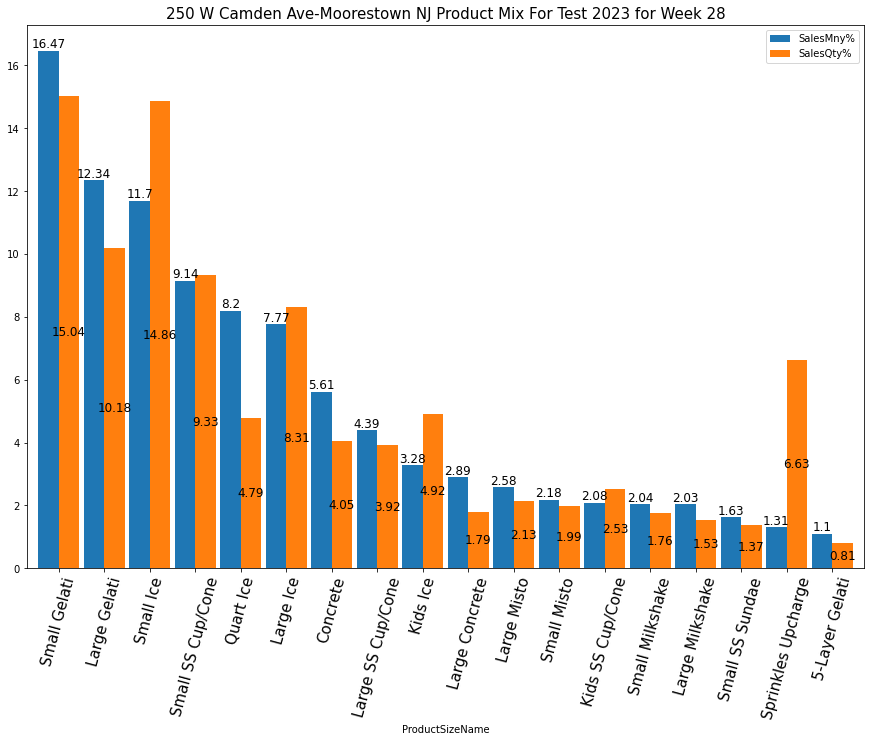

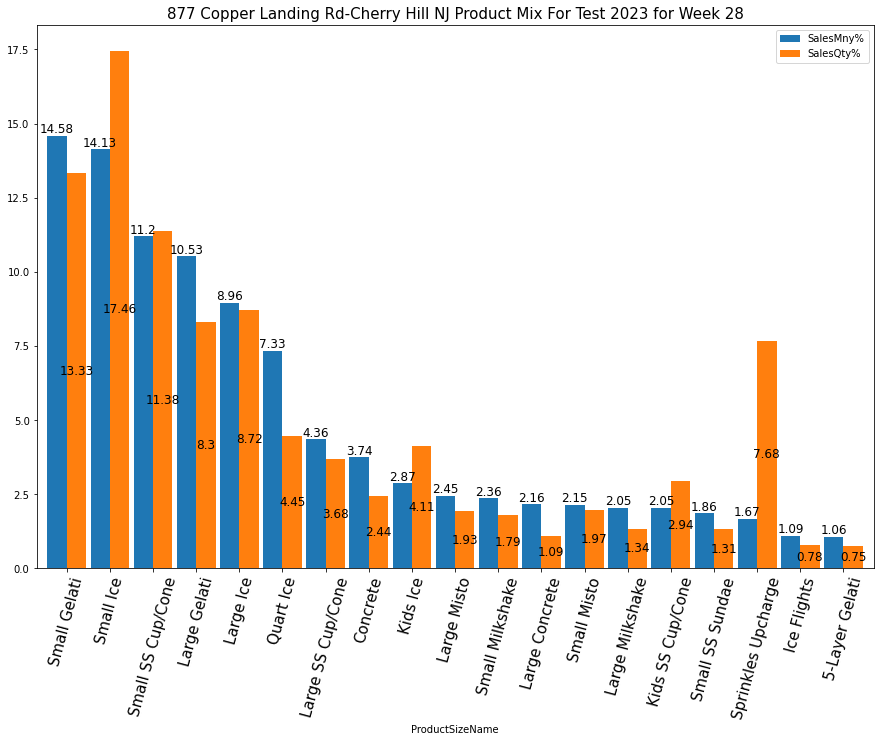

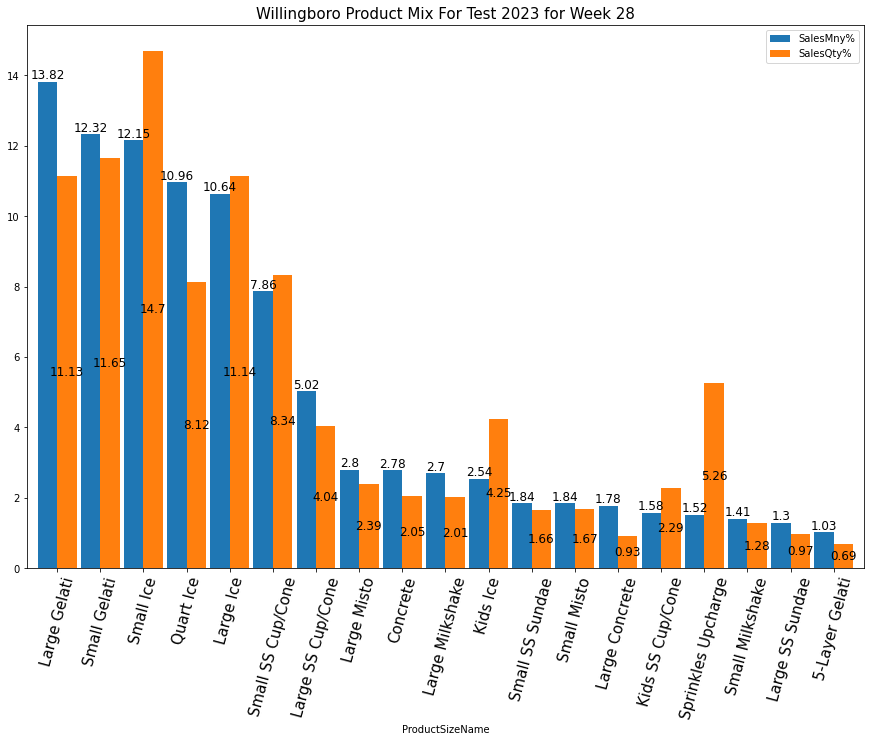

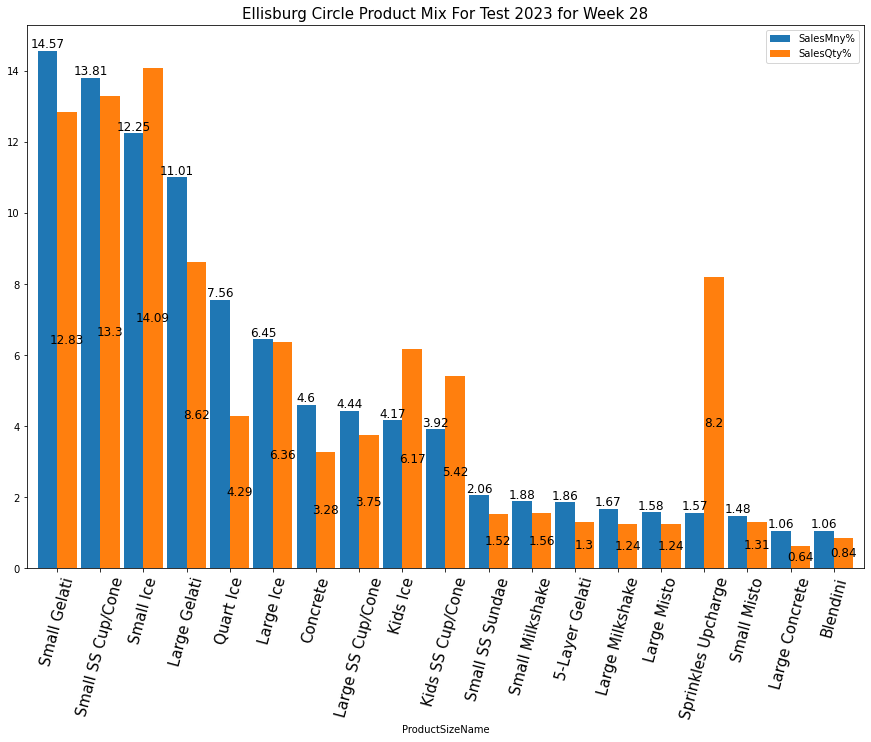

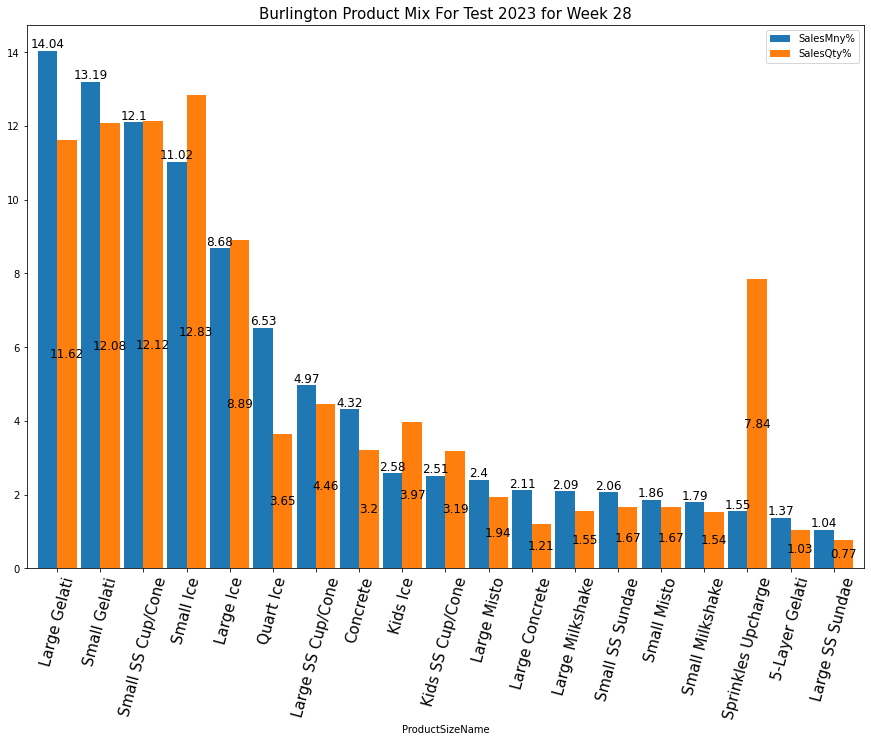

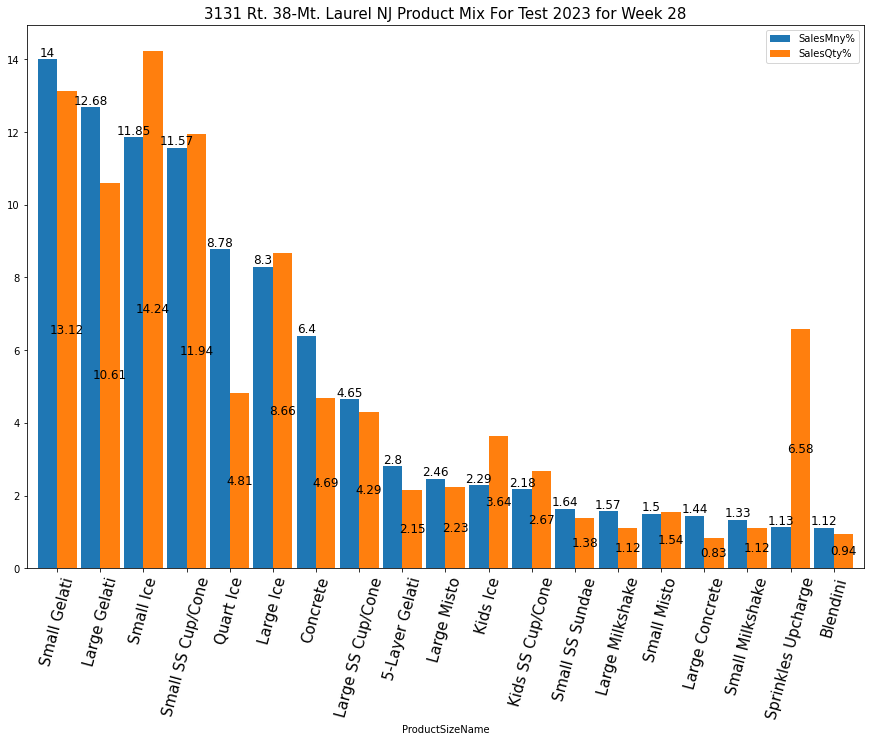

In [87]:
for i in enumerate(test_shops_23):
    plot=totals_test_23[totals_test_23.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(15,10),width=.9)
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12,label_type='center',)
    plt.title(str(i[1])+" Product Mix For Test 2023 for Week "+str(week),fontsize=15)
    plt.xticks(rotation=75,fontsize=15)

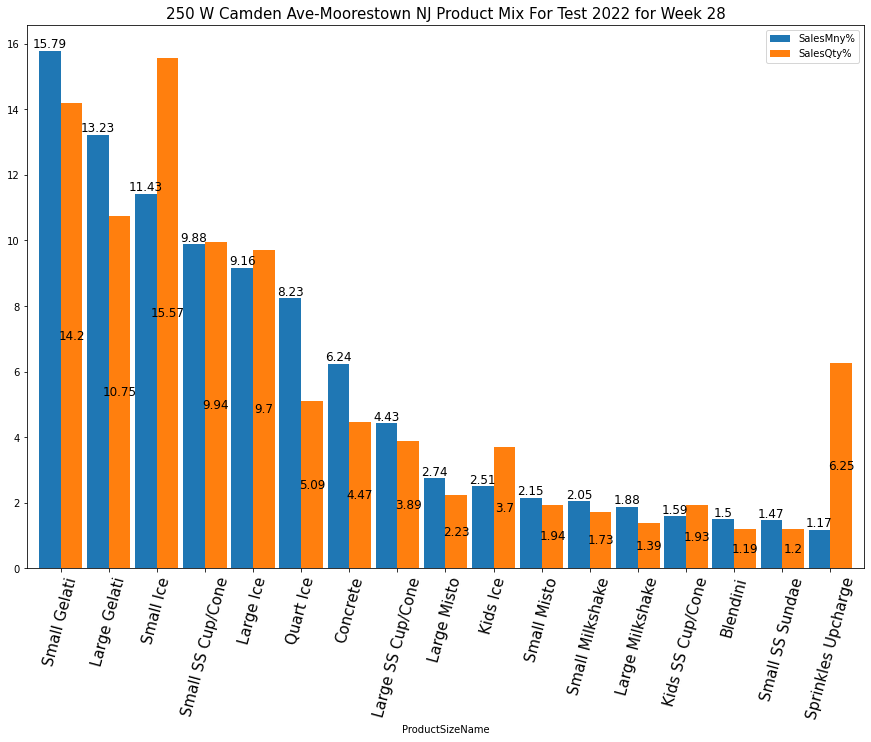

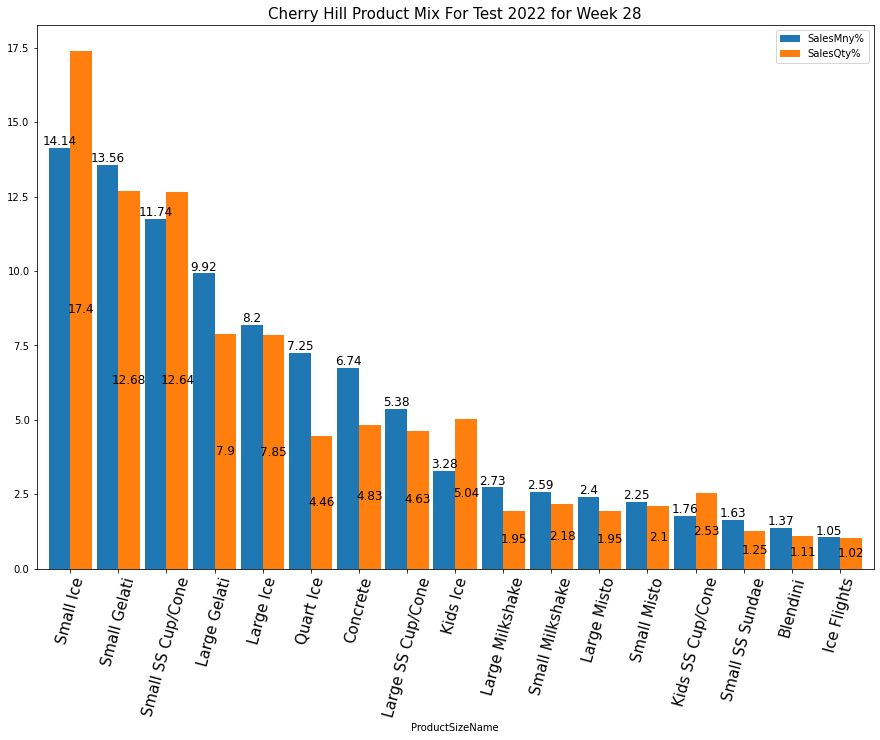

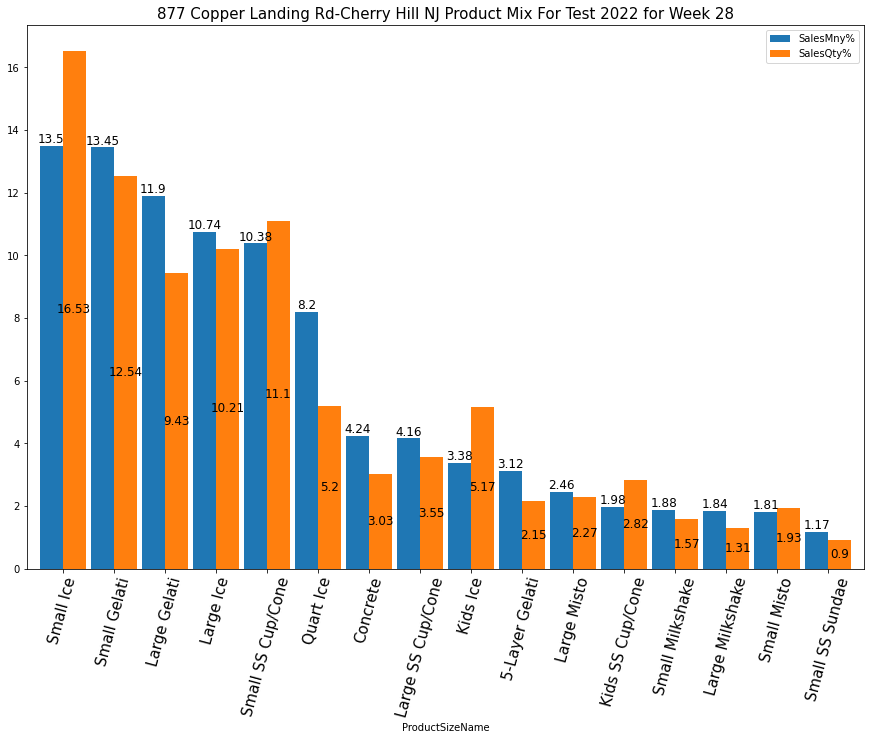

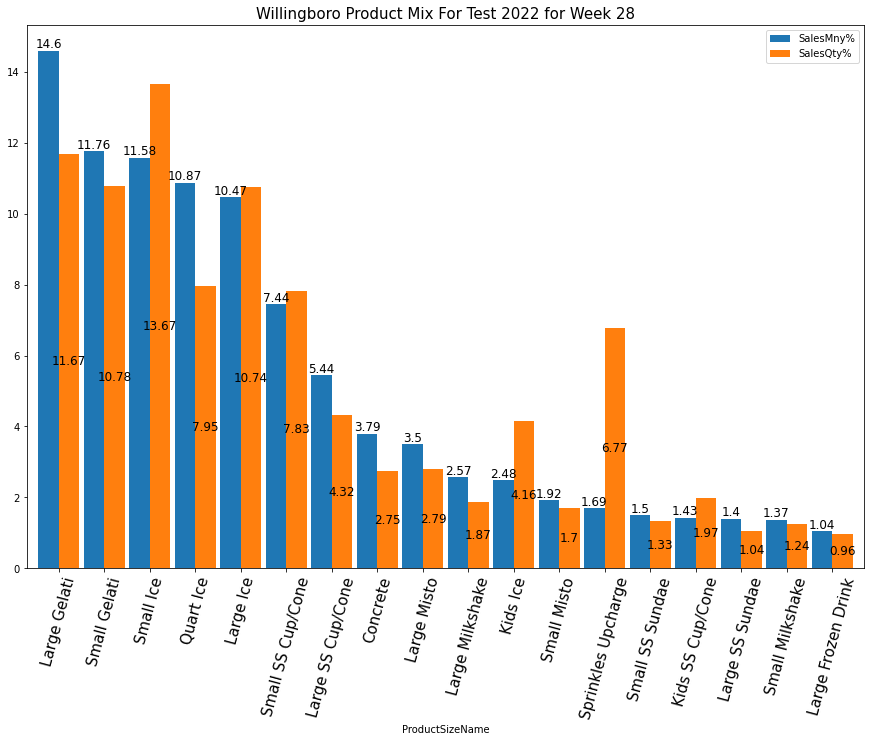

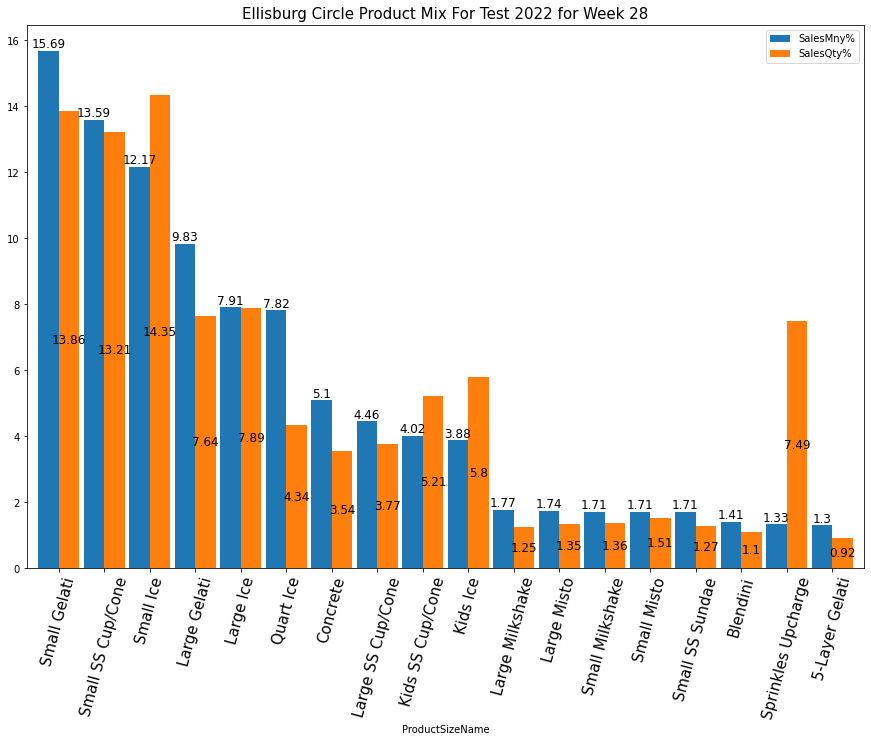

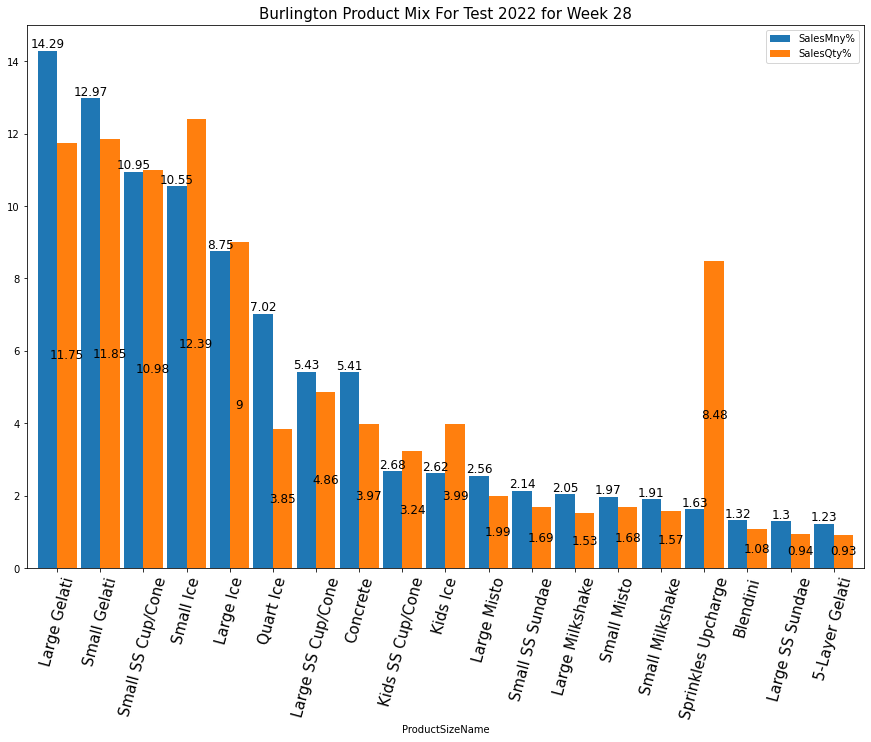

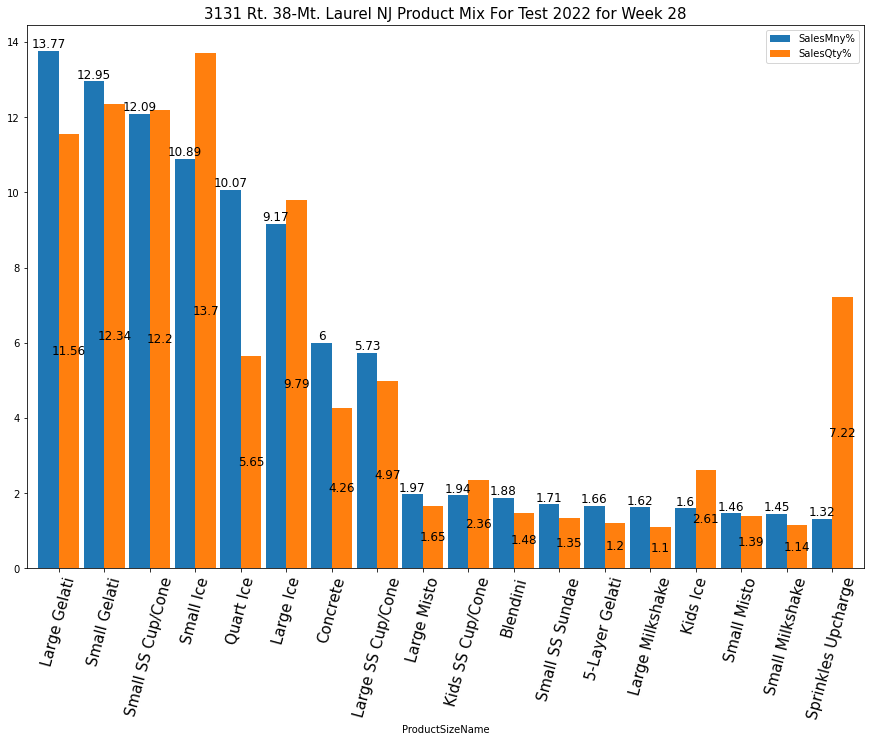

In [88]:
for i in enumerate(test_shops_22):
    plot=totals_test_22[totals_test_22.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(15,10),width=.9)
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12,label_type='center',)
    plt.title(str(i[1])+" Product Mix For Test 2022 for Week " +str(week),fontsize=15)
    plt.xticks(rotation=75,fontsize=15)

### Mustard and Pretzels

In [89]:
#Test Shops and Product Codes to look at
test_shops=[18,164,241,29,427,342,931,932,14,889,1045,1046,1047,54,152,171,161]
products=[1265,1260,126,125,124,123,27,122]

In [90]:
#Graps the only products we want and the test shops that are selling them
pretzels=data[(data.ShopID.isin(test_shops))&(data.ProdSizeCode.isin(products))]

In [91]:
#Sums up the Sales and Quantity Sold by Shop Name and Product
pg=pretzels.groupby(['ShopName','ProductSizeName'])[['SalesMny','SalesQty']].sum().reset_index()


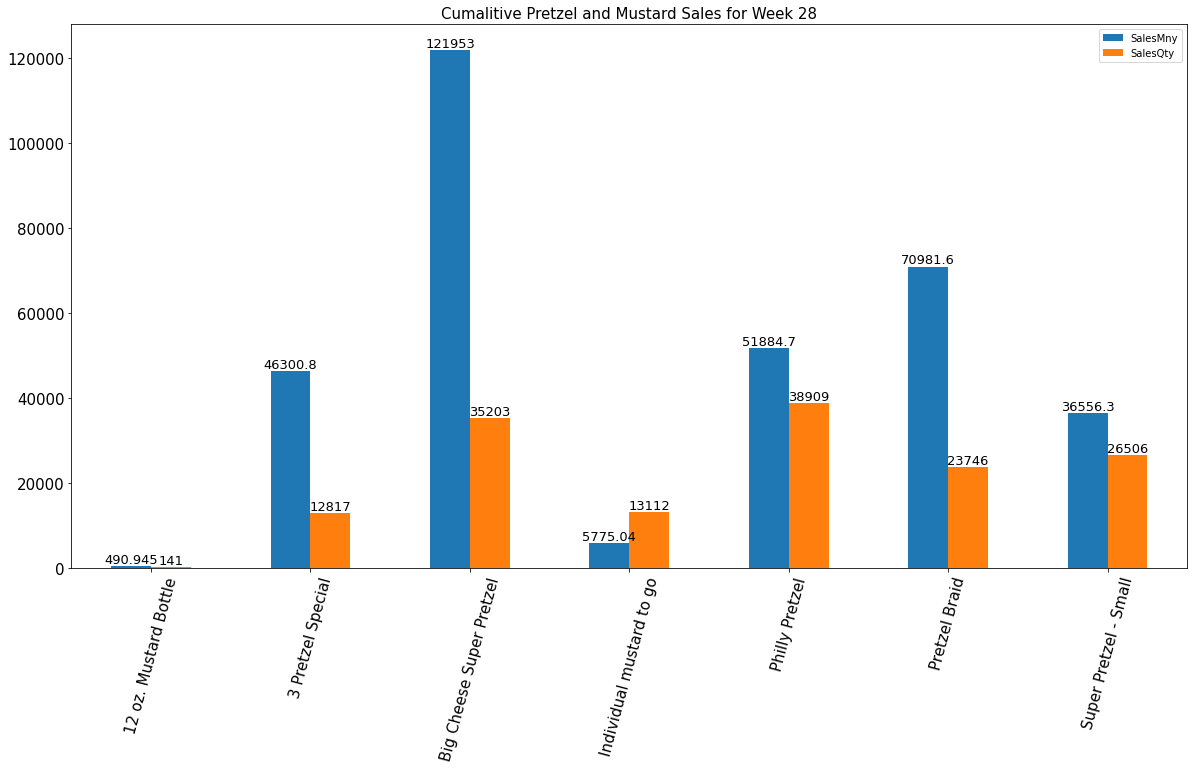

In [92]:
plot=pretzels.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().reset_index()
ax=plot.plot.bar(figsize=(20,10))
ax.set_xticklabels(plot.ProductSizeName)
plt.title('Cumalitive Pretzel and Mustard Sales for Week ' +str(week),fontsize=15)
plt.xticks(rotation=75,fontsize=15)
plt.yticks(fontsize=15)
ax.bar_label(ax.containers[0],fontsize=13)
ax.bar_label(ax.containers[1],fontsize=13);

In [94]:
pretzel=xw.Book()
sht=pretzel.sheets[0]
sht.name='Pretzel Graphs'

In [95]:
fig=ax.get_figure()
sht.pictures.add(fig,name='Pretzel',left=sht.range('A4').left, top=sht.range('A4').top, height=500, width=700)

<Picture 'Pretzel' in <Sheet [Book3]Pretzel Graphs>>

In [96]:
#pretzels.groupby('ProductSizeName')[['SalesMny','SalesQty']].sum().plot(kind='bar', figsize=(20,10))
#plt.xticks(rotation=75,fontsize=15)
#plt.yticks(fontsize=15)
#plt.title('Cumalitive Pretzel and Mustard Sales',fontsize=15);

In [97]:
shops=list(pg.ShopName.unique())

In [98]:
list(enumerate(shops))

[(0, '110 Yorktown Plz-Elkins Park PA'),
 (1, '125 N Maple Ave-Evesham NJ'),
 (2, '1700 Old York Rd-Abington PA'),
 (3, '2nd and Grange'),
 (4, '4331 Swamp Rd-Doylestown PA'),
 (5, '6901 Stenton Ave-West Oak Ln PA'),
 (6, '8201 Stenton Ave-Mt. Airy PA'),
 (7, 'Collingdale'),
 (8, 'Dover'),
 (9, 'Folsom'),
 (10, 'Glenside'),
 (11, 'Harbison'),
 (12, 'Hunting Park'),
 (13, 'Mayfair'),
 (14, 'Medford'),
 (15, 'Rockland'),
 (16, 'Wissahickon')]

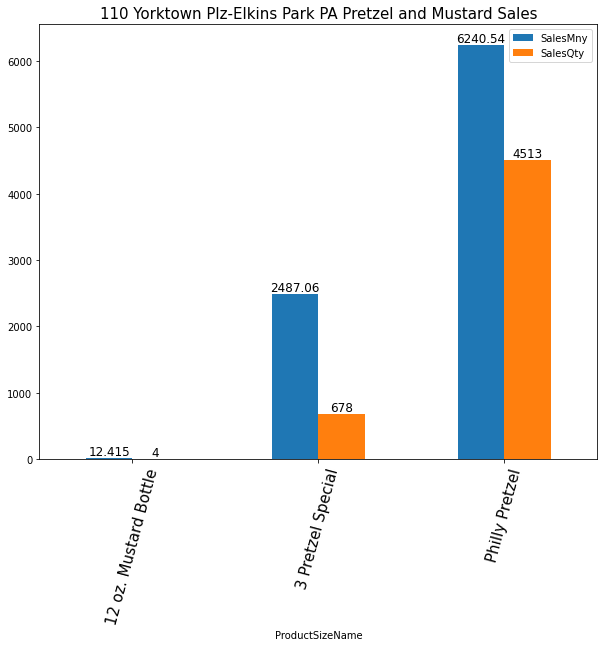

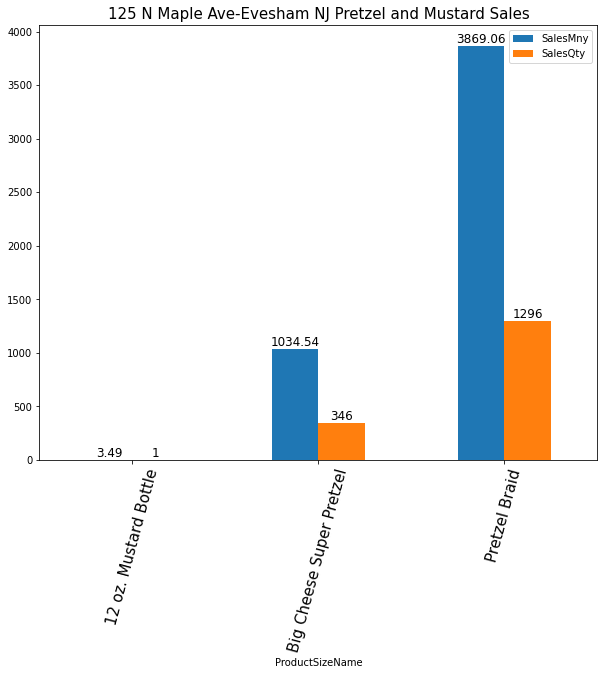

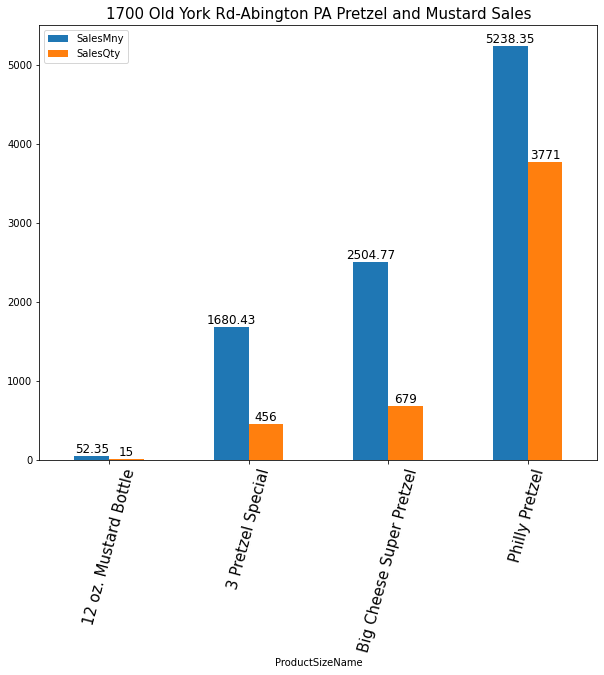

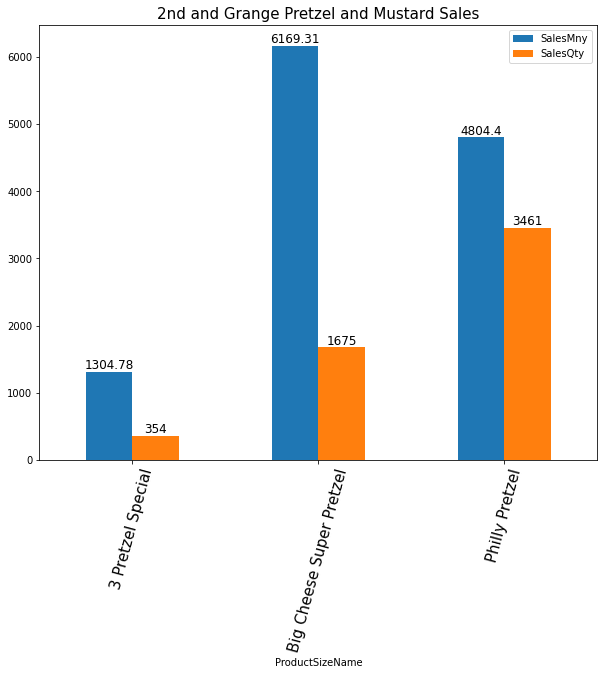

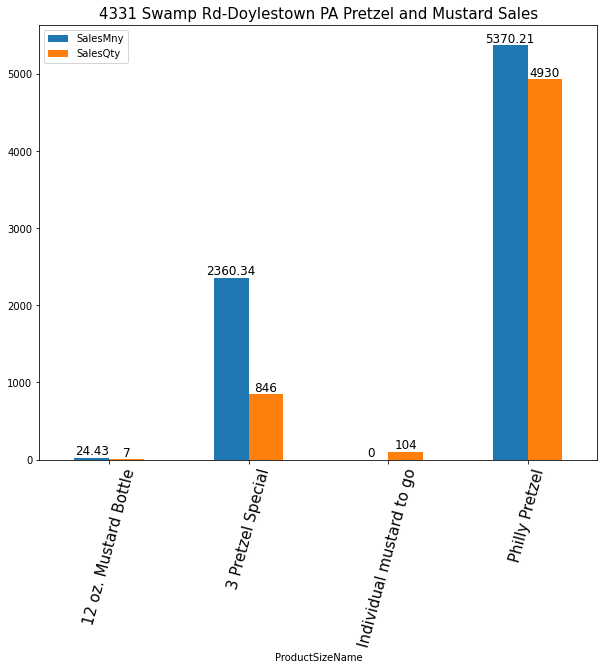

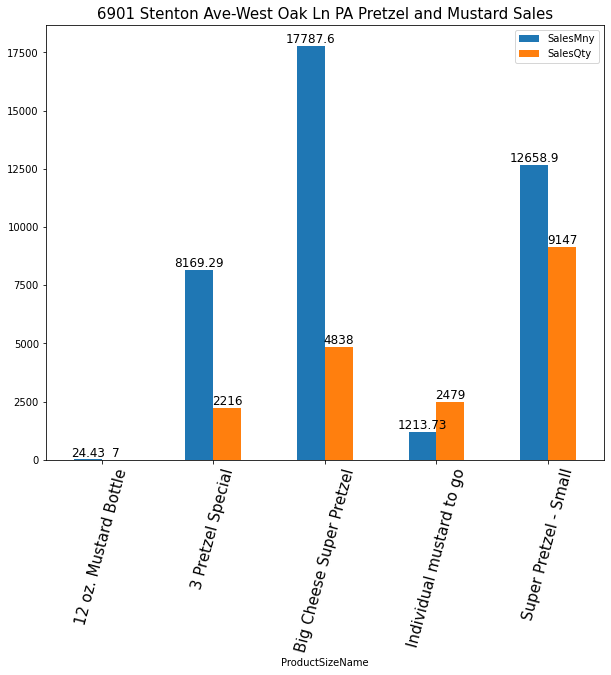

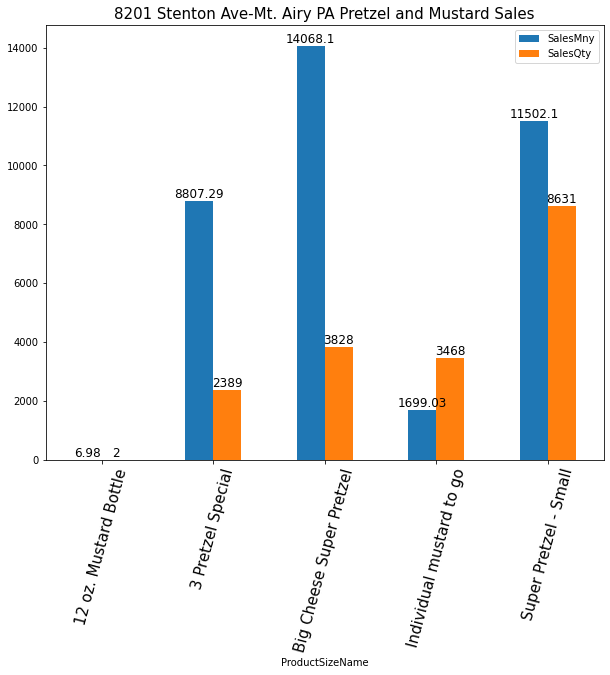

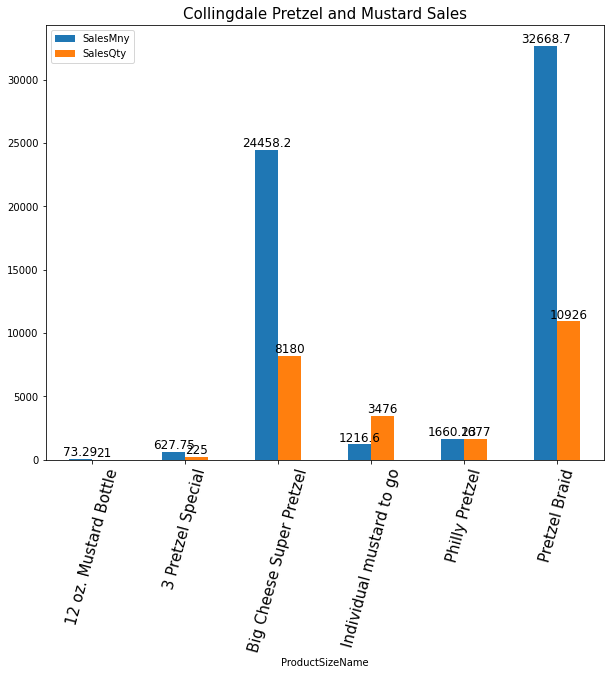

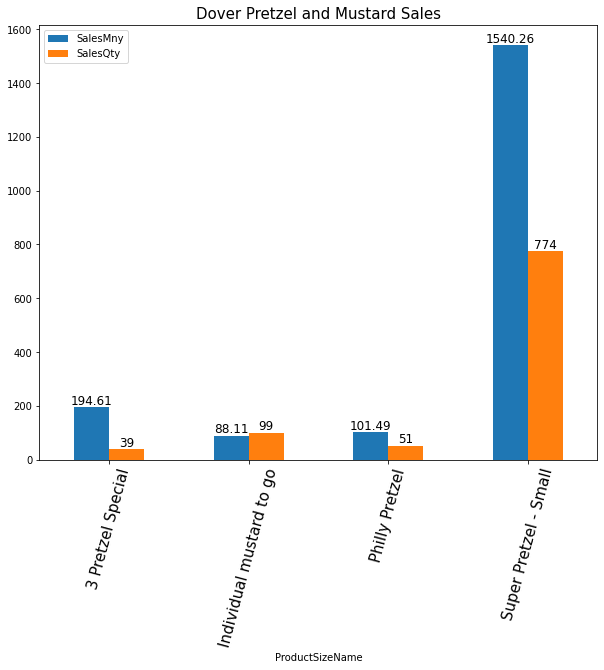

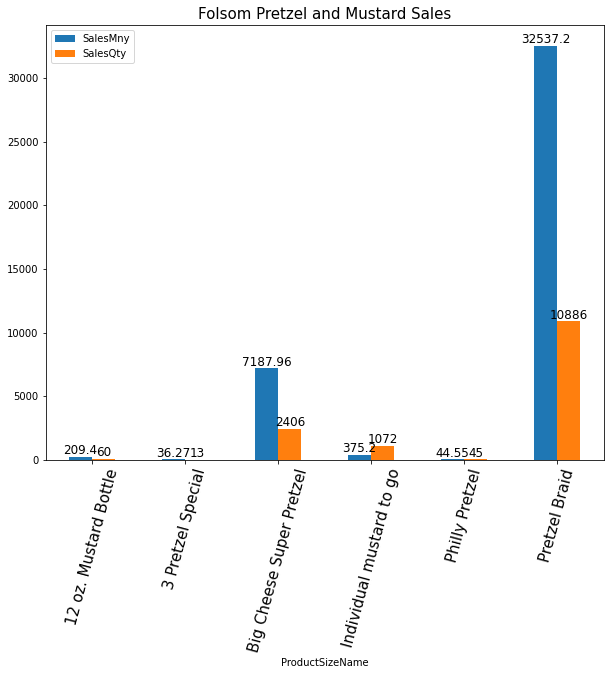

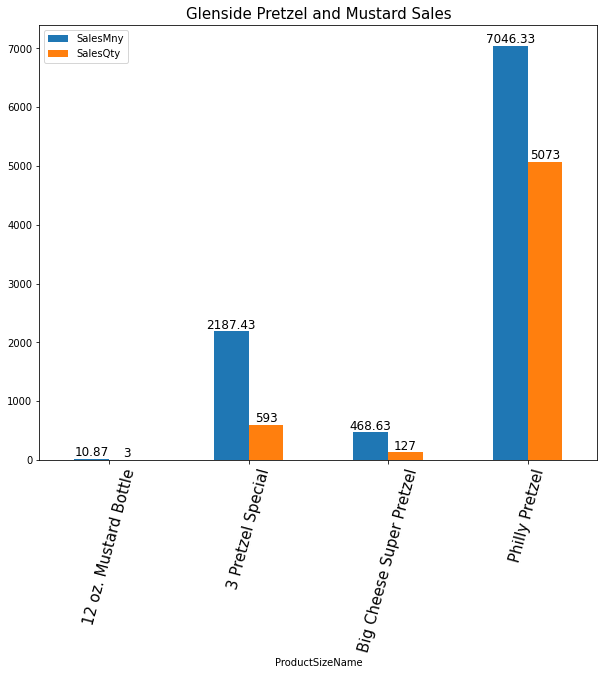

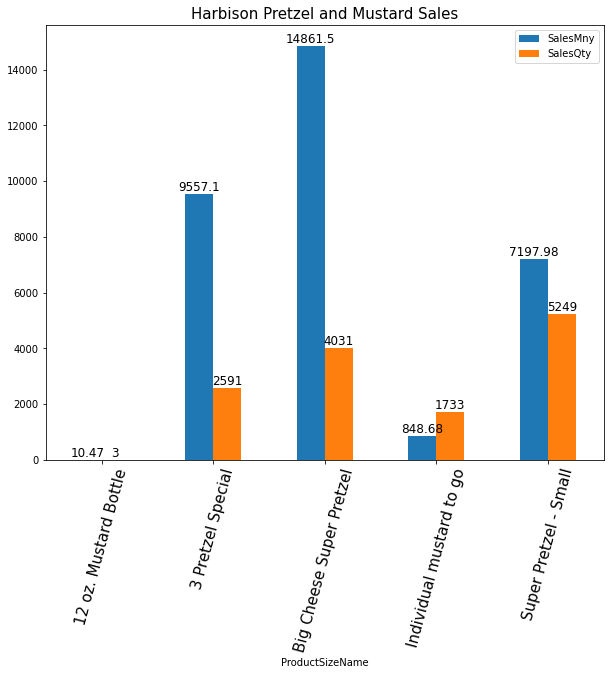

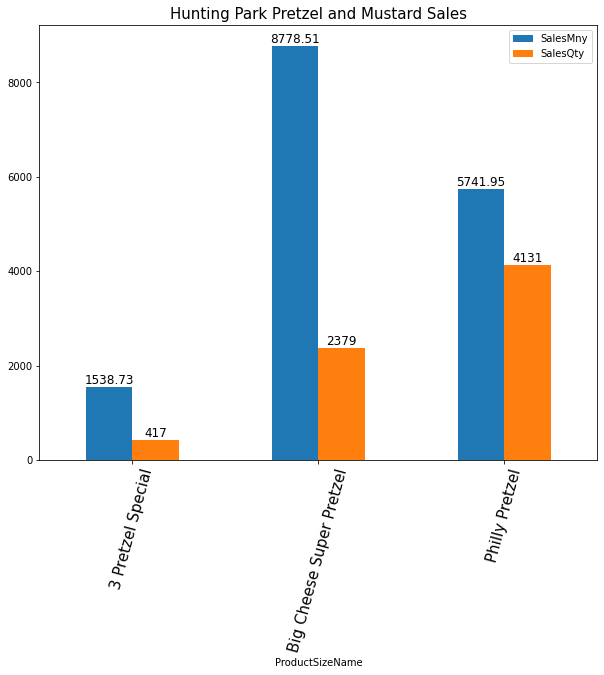

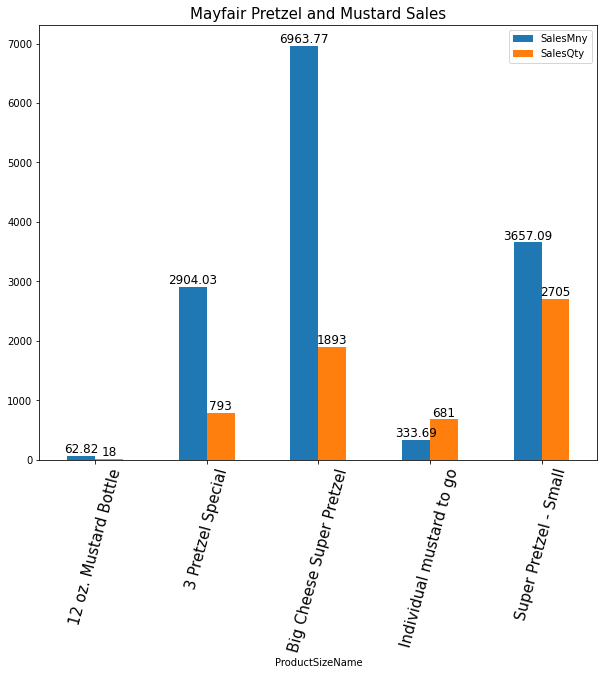

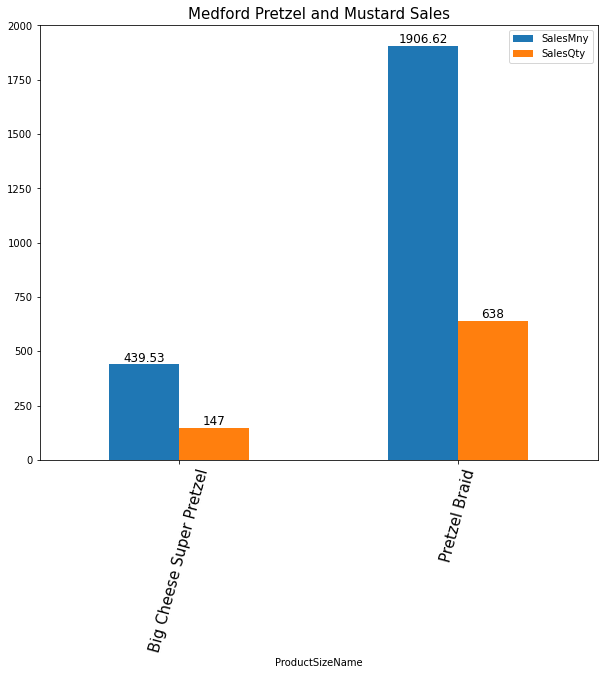

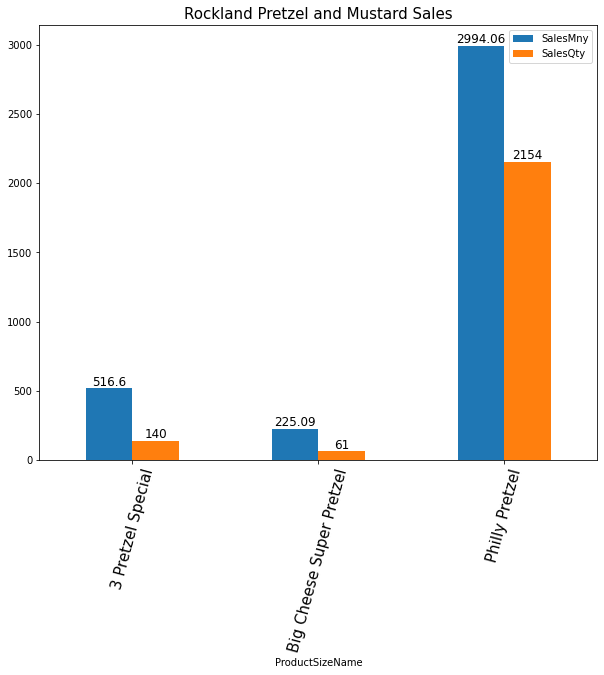

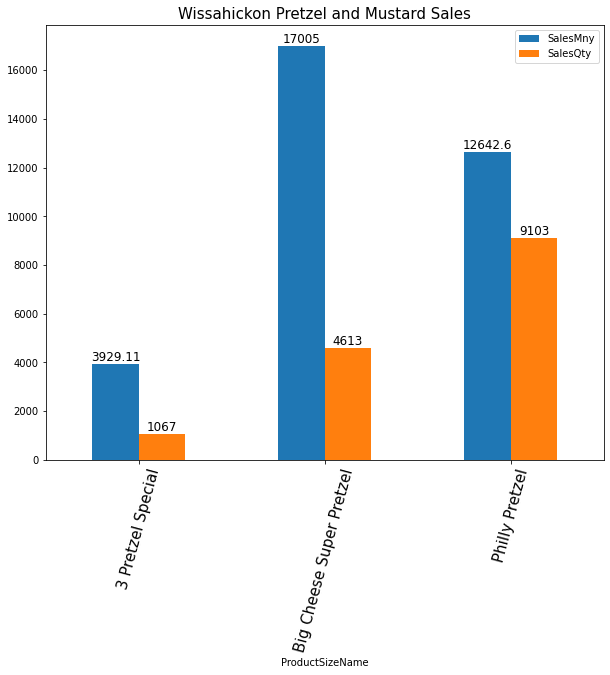

In [99]:

for i in enumerate(shops):
    plot=pg[pg.ShopName==i[1]].plot(x='ProductSizeName',kind='bar',figsize=(10,8))
    plt.bar_label(plot.containers[0],fontsize=12)
    plt.bar_label(plot.containers[1],fontsize=12)
    plt.title(str(i[1])+" Pretzel and Mustard Sales",fontsize=15)
    plt.xticks(rotation=75,fontsize=15)
   

In [100]:
comp=pretzels[(pretzels.Week==week)|(pretzels.Week==last_week)]
comp.Year.unique()

array([2023], dtype=int64)

In [101]:
comp.groupby(['ProductSizeName','Year','Week'])['SalesQty'].sum().reset_index()

ProductSizeName  Year  Week  SalesQty
0      12 oz. Mustard Bottle  2023    27         4
1      12 oz. Mustard Bottle  2023    28         7
2          3 Pretzel Special  2023    27       518
3          3 Pretzel Special  2023    28       523
4   Big Cheese Super Pretzel  2023    27      1351
5   Big Cheese Super Pretzel  2023    28      1235
6   Individual mustard to go  2023    27       561
7   Individual mustard to go  2023    28       553
8             Philly Pretzel  2023    27      1899
9             Philly Pretzel  2023    28      2058
10             Pretzel Braid  2023    27      1064
11             Pretzel Braid  2023    28      1181
12     Super Pretzel - Small  2023    27      1208
13     Super Pretzel - Small  2023    28      1242

In [102]:
comp_pivot=comp.pivot_table(index=['ProductSizeName'],columns=['Week'],values='SalesQty',aggfunc='sum',margins=True).reset_index()

In [103]:
comp_pivot['Perc_Change']=round((comp_pivot.iloc[:,2]-comp_pivot.iloc[:,1])/comp_pivot.iloc[:,1],2)*100

In [104]:
comp_pivot

Week           ProductSizeName    27    28    All  Perc_Change
0        12 oz. Mustard Bottle     4     7     11         75.0
1            3 Pretzel Special   518   523   1041          1.0
2     Big Cheese Super Pretzel  1351  1235   2586         -9.0
3     Individual mustard to go   561   553   1114         -1.0
4               Philly Pretzel  1899  2058   3957          8.0
5                Pretzel Braid  1064  1181   2245         11.0
6        Super Pretzel - Small  1208  1242   2450          3.0
7                          All  6605  6799  13404          3.0

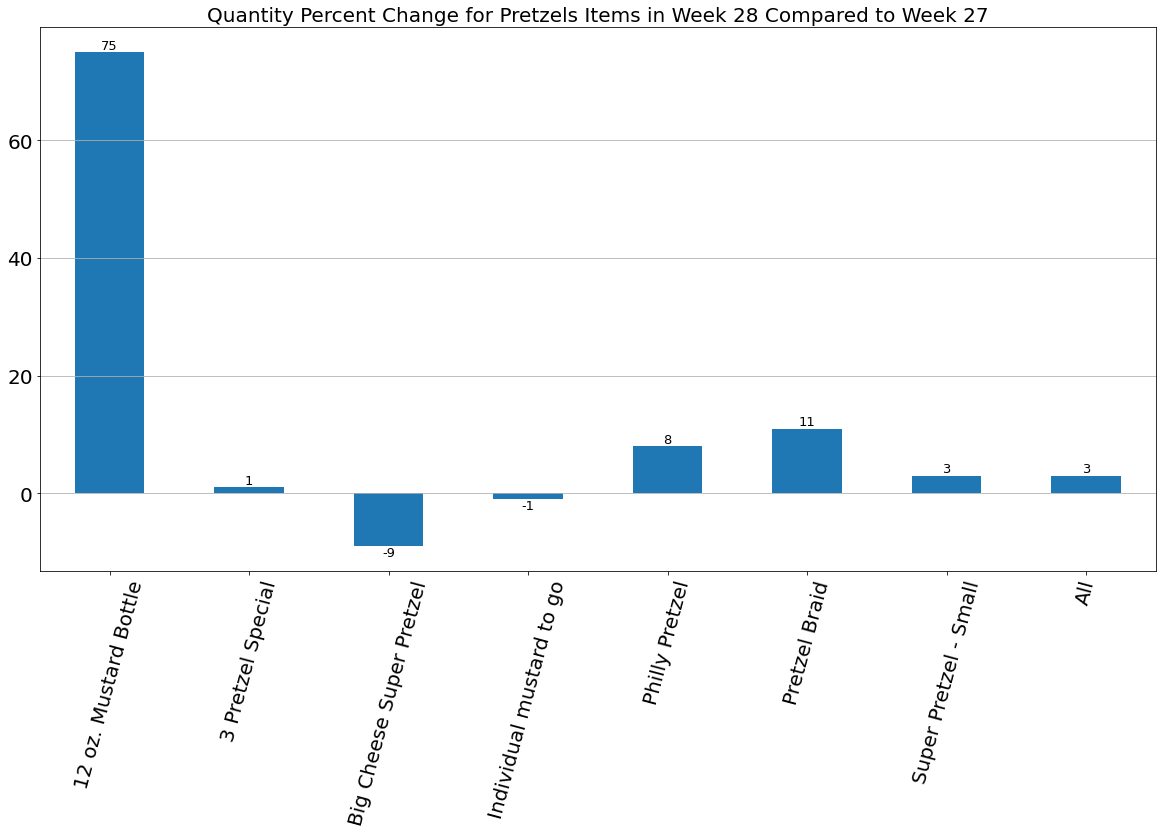

In [105]:
ax=comp_pivot['Perc_Change'].plot.bar(figsize=(20,10))
ax.set_xticklabels(comp_pivot.ProductSizeName)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title('Quantity Percent Change for Pretzels Items in Week '+str(week)+' Compared to Week '+str(last_week),fontsize=20)
plt.xticks(fontsize=20,rotation=75)
plt.grid(axis='y')
plt.yticks(fontsize=20);